In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Problem Statement:-
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3674,2015-10-20,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,...,67.0,37.0,1021.4,1016.4,1.0,1.0,21.5,30.3,No,No
3675,2015-10-21,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,...,54.0,39.0,1014.7,1010.6,1.0,5.0,24.7,30.2,No,Yes
3676,2015-10-22,Williamtown,17.5,26.3,19.8,7.8,NaN,SW,67.0,NaN,...,94.0,45.0,1012.4,1008.3,8.0,6.0,18.6,25.6,Yes,NaN
3677,2015-10-23,Williamtown,14.7,21.4,NaN,NaN,NaN,S,59.0,WSW,...,90.0,48.0,1021.4,1020.9,7.0,5.0,15.6,20.3,NaN,NaN
3678,2015-10-24,Williamtown,11.0,22.5,NaN,NaN,NaN,E,35.0,NW,...,65.0,60.0,1024.5,1021.4,NaN,NaN,18.4,21.4,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,...,77.0,60.0,1015.2,1014.0,8.0,2.0,20.8,23.8,No,No
6144,2012-01-26,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,...,67.0,55.0,1018.5,1016.9,NaN,NaN,18.9,23.7,No,NaN
6145,2012-01-27,Melbourne,16.6,30.7,NaN,8.0,13.0,SSE,39.0,WSW,...,69.0,55.0,1016.9,1013.5,NaN,NaN,20.5,26.3,NaN,NaN
6146,2012-01-28,Melbourne,20.0,30.4,NaN,8.2,12.1,SSE,37.0,SW,...,64.0,55.0,1012.7,1009.2,NaN,NaN,24.1,27.4,NaN,NaN


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.shape

(6762, 23)

In [9]:
df.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [10]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              4226
           Yes              779
Yes        No               797
           Yes              756
Name: RainTomorrow, dtype: int64

In [11]:
for column in df:
    if df[column].dtype=='object':
        print(column)
        print(df[column].value_counts())
        print('^'*100)

Date
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
WindGustDir
E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [12]:
## Imputing categorial variable..
for column in df:
    if df[column].dtype=='object':
        df[column]=df[column].fillna(df[column].mode()[0])


In [13]:
df.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir         0
WindGustSpeed     942
WindDir9am          0
WindDir3pm          0
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday           0
RainTomorrow        0
dtype: int64

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [15]:
df1=df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
       'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

In [16]:
imp=IterativeImputer(random_state=42)

In [17]:
imputed=imp.fit_transform(df1)

In [18]:
df2=pd.DataFrame(imputed,columns=df1.columns)

In [19]:
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.043013,6.638742,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.029625,16.9,21.8
1,7.4,25.100000,0.0,5.892237,12.245881,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,0.996959,1.528732,17.2,24.3
2,12.9,25.700000,0.0,7.144043,11.673420,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,2.053331,2.000000,21.0,23.2
3,9.2,28.000000,0.0,5.268806,12.652787,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,0.360171,0.913110,18.1,26.5
4,17.5,32.300000,1.0,5.559384,6.114685,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2.8,23.400000,0.0,4.045590,11.486012,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,0.606602,1.365773,10.1,22.4
6758,3.6,25.300000,0.0,3.696319,12.100952,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,0.470900,0.911762,10.9,24.5
6759,5.4,26.900000,0.0,5.630316,11.865670,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,0.743505,1.411992,12.5,26.1
6760,7.8,27.000000,0.0,5.702430,10.738197,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [20]:
df['MinTemp']=df2['MinTemp']
df['MaxTemp']=df2['MaxTemp']
df['Rainfall']=df2['Rainfall']
df['Evaporation']=df2['Evaporation']
df['Sunshine']=df2['Sunshine']
df['WindGustSpeed']=df2['WindGustSpeed']
df['WindSpeed3pm']=df2['WindSpeed3pm']
df['WindSpeed9am']=df2['WindSpeed9am']
df['Humidity9am']=df2['Humidity9am']
df['Humidity3pm']=df2['Humidity3pm']
df['Pressure9am']=df2['Pressure9am']
df['Pressure3pm']=df2['Pressure3pm']
df['Cloud9am']=df2['Cloud9am']
df['Cloud3pm']=df2['Cloud3pm']
df['Temp9am']=df2['Temp9am']
df['Temp3pm']=df2['Temp3pm']


In [21]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.043013,6.638742,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.029625,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.892237,12.245881,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.996959,1.528732,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.144043,11.673420,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.053331,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.268806,12.652787,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.360171,0.913110,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.559384,6.114685,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,NaN,NaN,NaN,NaN,NaN,E,NaN,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
8421,2017-06-22,Uluru,NaN,NaN,NaN,NaN,NaN,NNW,NaN,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
8422,2017-06-23,Uluru,NaN,NaN,NaN,NaN,NaN,N,NaN,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
8423,2017-06-24,Uluru,NaN,NaN,NaN,NaN,NaN,SE,NaN,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        5099 non-null   float64
 3   MaxTemp        5099 non-null   float64
 4   Rainfall       5099 non-null   float64
 5   Evaporation    5099 non-null   float64
 6   Sunshine       5099 non-null   float64
 7   WindGustDir    6762 non-null   object 
 8   WindGustSpeed  5099 non-null   float64
 9   WindDir9am     6762 non-null   object 
 10  WindDir3pm     6762 non-null   object 
 11  WindSpeed9am   5099 non-null   float64
 12  WindSpeed3pm   5099 non-null   float64
 13  Humidity9am    5099 non-null   float64
 14  Humidity3pm    5099 non-null   float64
 15  Pressure9am    5099 non-null   float64
 16  Pressure3pm    5099 non-null   float64
 17  Cloud9am       5099 non-null   float64
 18  Cloud3pm

In [23]:
df.isna().sum()

Date                0
Location            0
MinTemp          1663
MaxTemp          1663
Rainfall         1663
Evaporation      1663
Sunshine         1663
WindGustDir         0
WindGustSpeed    1663
WindDir9am          0
WindDir3pm          0
WindSpeed9am     1663
WindSpeed3pm     1663
Humidity9am      1663
Humidity3pm      1663
Pressure9am      1663
Pressure3pm      1663
Cloud9am         1663
Cloud3pm         1663
Temp9am          1663
Temp3pm          1663
RainToday           0
RainTomorrow        0
dtype: int64

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [26]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000
mean,13.231224,24.289342,2.967609,4.801422,7.687766,35.794566,10.959968,16.279134,68.779998,51.551380,1017.810573,1015.140451,4.121624,4.067908,18.135258,22.906173
std,5.708838,6.043781,11.561566,4.038852,3.506908,14.032101,8.901420,9.502997,17.184229,18.911054,5.765305,5.747198,2.663001,2.507856,5.741610,5.898394
min,-2.000000,8.200000,-5.707261,-3.448087,-1.390081,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.974960,-3.384271,1.900000,7.300000
25%,9.000000,19.800000,0.000000,2.600000,5.149616,26.000000,4.000000,9.000000,57.000000,38.000000,1014.500000,1011.600000,1.825608,2.000000,14.200000,18.600000
50%,13.400000,23.800000,0.000000,4.400000,8.100000,33.000000,9.000000,15.000000,69.000000,51.000000,1018.000000,1015.400000,4.000000,4.000000,18.300000,22.500000
75%,17.800000,28.500000,1.000000,6.402322,10.300000,44.000000,17.000000,22.000000,82.000000,64.000000,1021.199771,1018.400000,7.000000,6.000000,22.400000,26.900000
max,28.500000,45.500000,371.000000,145.000000,18.865000,158.545977,56.000000,83.000000,100.000000,99.000000,1038.700000,1036.000000,9.528685,9.920939,39.400000,44.100000


# EDA

### Univariate Analysis

In [27]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [28]:
cr=pd.crosstab(index=df['Location'],columns=df['RainTomorrow'])

In [29]:
cr

RainTomorrow,No,Yes
Location,,
Adelaide,19,16
Albury,708,199
Brisbane,444,135
CoffsHarbour,425,186
Melbourne,608,203
Newcastle,624,198
Penrith,366,116
Williamtown,462,153
Wollongong,174,63


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Adelaide'),
  Text(1, 0, 'Albury'),
  Text(2, 0, 'Brisbane'),
  Text(3, 0, 'CoffsHarbour'),
  Text(4, 0, 'Melbourne'),
  Text(5, 0, 'Newcastle'),
  Text(6, 0, 'Penrith'),
  Text(7, 0, 'Williamtown'),
  Text(8, 0, 'Wollongong')])

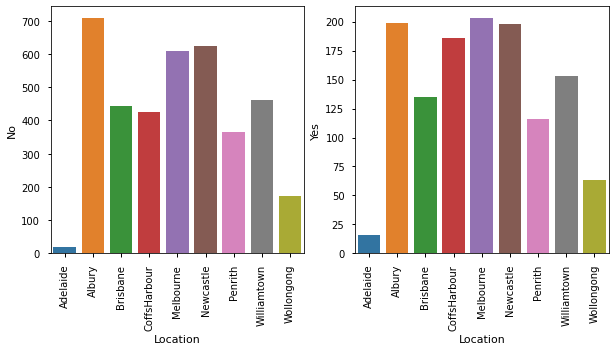

In [30]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=90)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=90)


In [31]:
df['Date']=pd.to_datetime(df['Date'])
df["Day"] = df['Date'].dt.day
df["Month"] = df['Date'].dt.month


In [32]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,2008-12-01,Albury,13.4,22.900000,0.6,5.043013,6.638742,W,44.000000,W,...,1007.7,1007.1,8.000000,5.029625,16.9,21.8,No,No,1,12
1,2008-12-02,Albury,7.4,25.100000,0.0,5.892237,12.245881,WNW,44.000000,NNW,...,1010.6,1007.8,0.996959,1.528732,17.2,24.3,No,No,2,12
2,2008-12-03,Albury,12.9,25.700000,0.0,7.144043,11.673420,WSW,46.000000,W,...,1007.6,1008.7,2.053331,2.000000,21.0,23.2,No,No,3,12
3,2008-12-04,Albury,9.2,28.000000,0.0,5.268806,12.652787,NE,24.000000,SE,...,1017.6,1012.8,0.360171,0.913110,18.1,26.5,No,No,4,12
4,2008-12-05,Albury,17.5,32.300000,1.0,5.559384,6.114685,W,41.000000,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2014-07-07,Adelaide,2.8,23.400000,0.0,4.045590,11.486012,N,31.000000,N,...,1024.6,1020.3,0.606602,1.365773,10.1,22.4,No,No,7,7
6758,2014-07-08,Adelaide,3.6,25.300000,0.0,3.696319,12.100952,WNW,22.000000,NNE,...,1023.5,1019.1,0.470900,0.911762,10.9,24.5,No,Yes,8,7
6759,2014-07-09,Adelaide,5.4,26.900000,0.0,5.630316,11.865670,WSW,37.000000,SSW,...,1021.0,1016.8,0.743505,1.411992,12.5,26.1,Yes,Yes,9,7
6760,2014-07-10,Adelaide,7.8,27.000000,0.0,5.702430,10.738197,WSW,28.000000,S,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,Yes,No,10,7


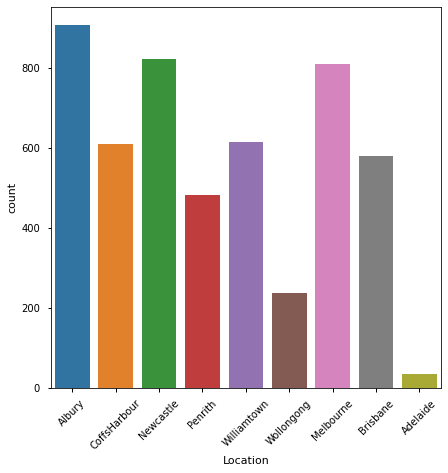

In [33]:
plt.figure(figsize=(7,7))
sns.countplot(x='Location',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- Albury has high frequency of data for rainfall

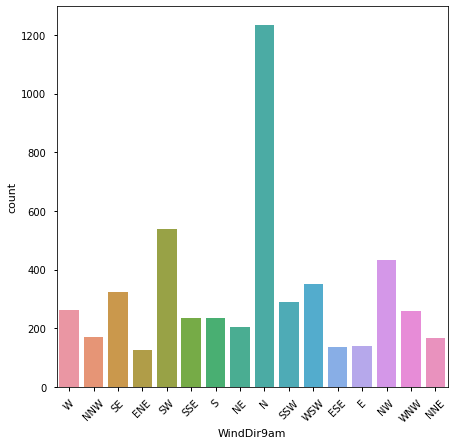

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(x='WindDir9am',data=df)
plt.xticks(rotation=45)
plt.show()

###  Observation:- Mostly wind direction is North direction

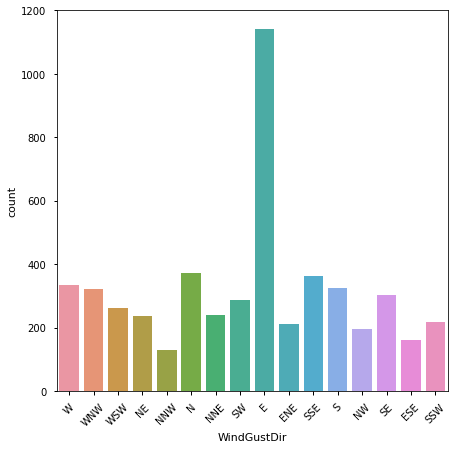

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(x='WindGustDir',data=df)
plt.xticks(rotation=45)
plt.show()

### Mostly the wind direction is in the East

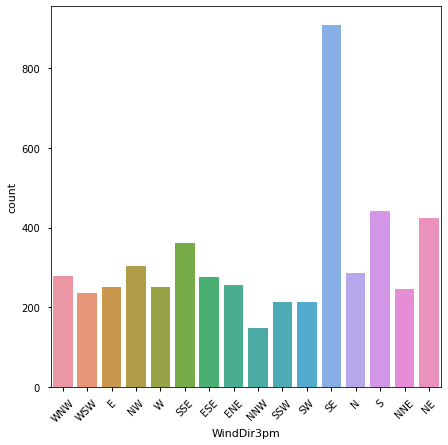

In [36]:
plt.figure(figsize=(7,7))
sns.countplot(x='WindDir3pm',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The wind direction at 3 pm is at south east

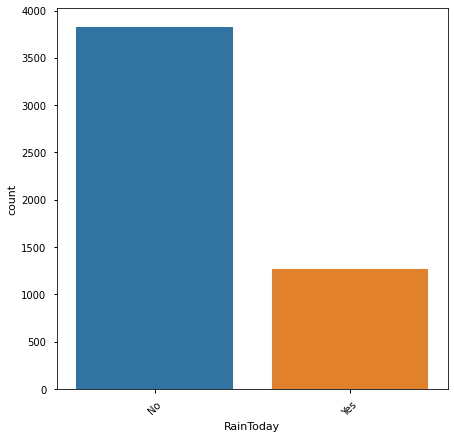

In [37]:
plt.figure(figsize=(7,7))
sns.countplot(x='RainToday',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- Mostly it is not raining as of current date


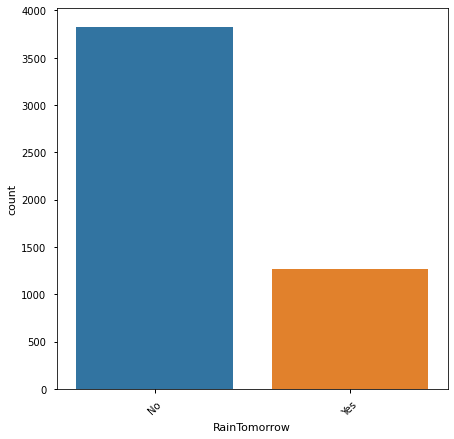

In [38]:
plt.figure(figsize=(7,7))
sns.countplot(x='RainTomorrow',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The chance of rain for tomorrow is also less

In [39]:
df.drop('Date',axis=1,inplace=True)

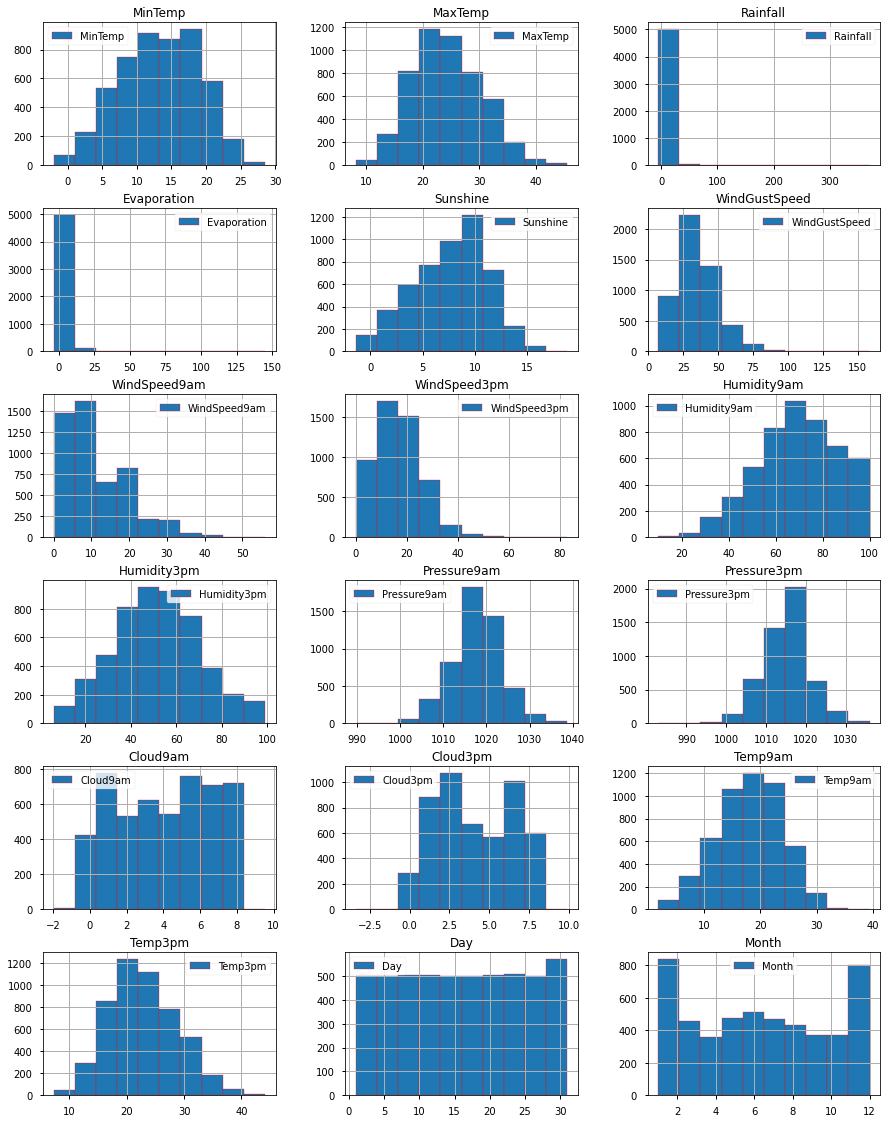

In [40]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),legend=True)
plt.show()



## Observation:- 

1. The minimum temperature is between 10 to 18.

2. Maximum temperature is between 20 to 30.

3. Rainfall is between 0 to 5 cm.

4. Evapouration is between 0 to 5.

5. Sunshine is mostly between 5 to 12. 

6. windgust speed is between 20 to 50.

7. Wind speed is more at 3pm as compared to 9am.

8. Humidity is more at 9am as compared to 3pm.

9. Cloud at 3pm is more than 9am.

10. Temperature at 3pm is slightly low as compared to 9am.



### Bivariate analysis

In [41]:
cr=pd.crosstab(index=df['WindDir9am'],columns=df['RainTomorrow'])
cr

RainTomorrow,No,Yes
WindDir9am,,
E,105,33
ENE,93,33
ESE,91,45
N,924,311
NE,154,49
NNE,128,38
NNW,124,45
NW,345,88
S,174,62


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'ENE'),
  Text(2, 0, 'ESE'),
  Text(3, 0, 'N'),
  Text(4, 0, 'NE'),
  Text(5, 0, 'NNE'),
  Text(6, 0, 'NNW'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'S'),
  Text(9, 0, 'SE'),
  Text(10, 0, 'SSE'),
  Text(11, 0, 'SSW'),
  Text(12, 0, 'SW'),
  Text(13, 0, 'W'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'WSW')])

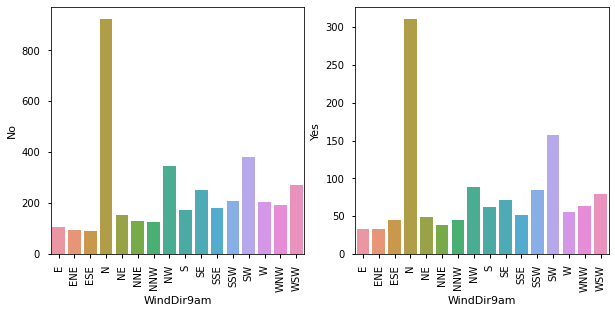

In [42]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=90)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=90)


### Observation:- When wind flows to the North has higher chance that it will rain tommorrow.

In [43]:
cr=pd.crosstab(index=df['WindDir3pm'],columns=df['RainTomorrow'])
cr

RainTomorrow,No,Yes
WindDir3pm,,
E,182,70
ENE,189,67
ESE,216,60
N,204,81
NE,340,84
NNE,192,53
NNW,92,55
NW,236,68
S,328,115


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'ENE'),
  Text(2, 0, 'ESE'),
  Text(3, 0, 'N'),
  Text(4, 0, 'NE'),
  Text(5, 0, 'NNE'),
  Text(6, 0, 'NNW'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'S'),
  Text(9, 0, 'SE'),
  Text(10, 0, 'SSE'),
  Text(11, 0, 'SSW'),
  Text(12, 0, 'SW'),
  Text(13, 0, 'W'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'WSW')])

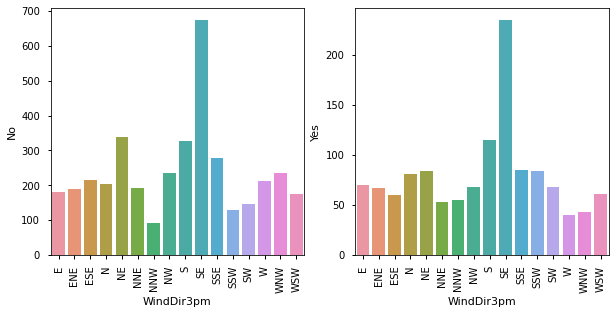

In [44]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=90)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=90)


### Observation:- when wind is in the direction of SE then at 3pm then chance of rain tomorrow is more

In [45]:
cr=pd.crosstab(index=df['WindGustDir'],columns=df['RainTomorrow'])
cr

RainTomorrow,No,Yes
WindGustDir,,
E,881,262
ENE,161,49
ESE,114,48
N,269,103
NE,181,56
NNE,182,57
NNW,96,34
NW,154,41
S,230,96


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'ENE'),
  Text(2, 0, 'ESE'),
  Text(3, 0, 'N'),
  Text(4, 0, 'NE'),
  Text(5, 0, 'NNE'),
  Text(6, 0, 'NNW'),
  Text(7, 0, 'NW'),
  Text(8, 0, 'S'),
  Text(9, 0, 'SE'),
  Text(10, 0, 'SSE'),
  Text(11, 0, 'SSW'),
  Text(12, 0, 'SW'),
  Text(13, 0, 'W'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'WSW')])

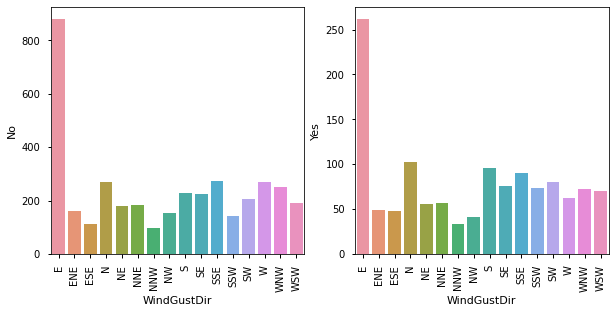

In [46]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=90)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=90)


### Observation:- When windgust direction is in the East then the chance of rain is more for tommorrow

In [47]:
cr=pd.crosstab(index=df['RainToday'],columns=df['RainTomorrow'])
cr


RainTomorrow,No,Yes
RainToday,,
No,3171,660
Yes,659,609


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

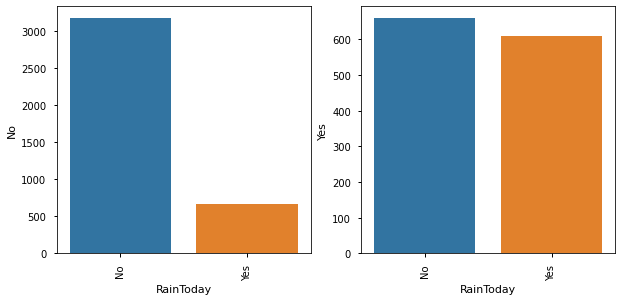

In [48]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=90)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=90)


### Observation:- If rain today is yes that means higher chance that it will rain tomorrow.

In [49]:
df.shape

(5099, 24)

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month'],
      dtype='object')

In [52]:
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]=df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].apply(le.fit_transform)

In [53]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,1,13.4,22.900000,0.6,5.043013,6.638742,13,44.000000,13,14,...,1007.7,1007.1,8.000000,5.029625,16.9,21.8,0,0,1,12
1,1,7.4,25.100000,0.0,5.892237,12.245881,14,44.000000,6,15,...,1010.6,1007.8,0.996959,1.528732,17.2,24.3,0,0,2,12
2,1,12.9,25.700000,0.0,7.144043,11.673420,15,46.000000,13,15,...,1007.6,1008.7,2.053331,2.000000,21.0,23.2,0,0,3,12
3,1,9.2,28.000000,0.0,5.268806,12.652787,4,24.000000,9,0,...,1017.6,1012.8,0.360171,0.913110,18.1,26.5,0,0,4,12
4,1,17.5,32.300000,1.0,5.559384,6.114685,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0,2.8,23.400000,0.0,4.045590,11.486012,3,31.000000,3,3,...,1024.6,1020.3,0.606602,1.365773,10.1,22.4,0,0,7,7
6758,0,3.6,25.300000,0.0,3.696319,12.100952,14,22.000000,5,3,...,1023.5,1019.1,0.470900,0.911762,10.9,24.5,0,1,8,7
6759,0,5.4,26.900000,0.0,5.630316,11.865670,15,37.000000,11,12,...,1021.0,1016.8,0.743505,1.411992,12.5,26.1,1,1,9,7
6760,0,7.8,27.000000,0.0,5.702430,10.738197,15,28.000000,8,13,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,1,0,10,7


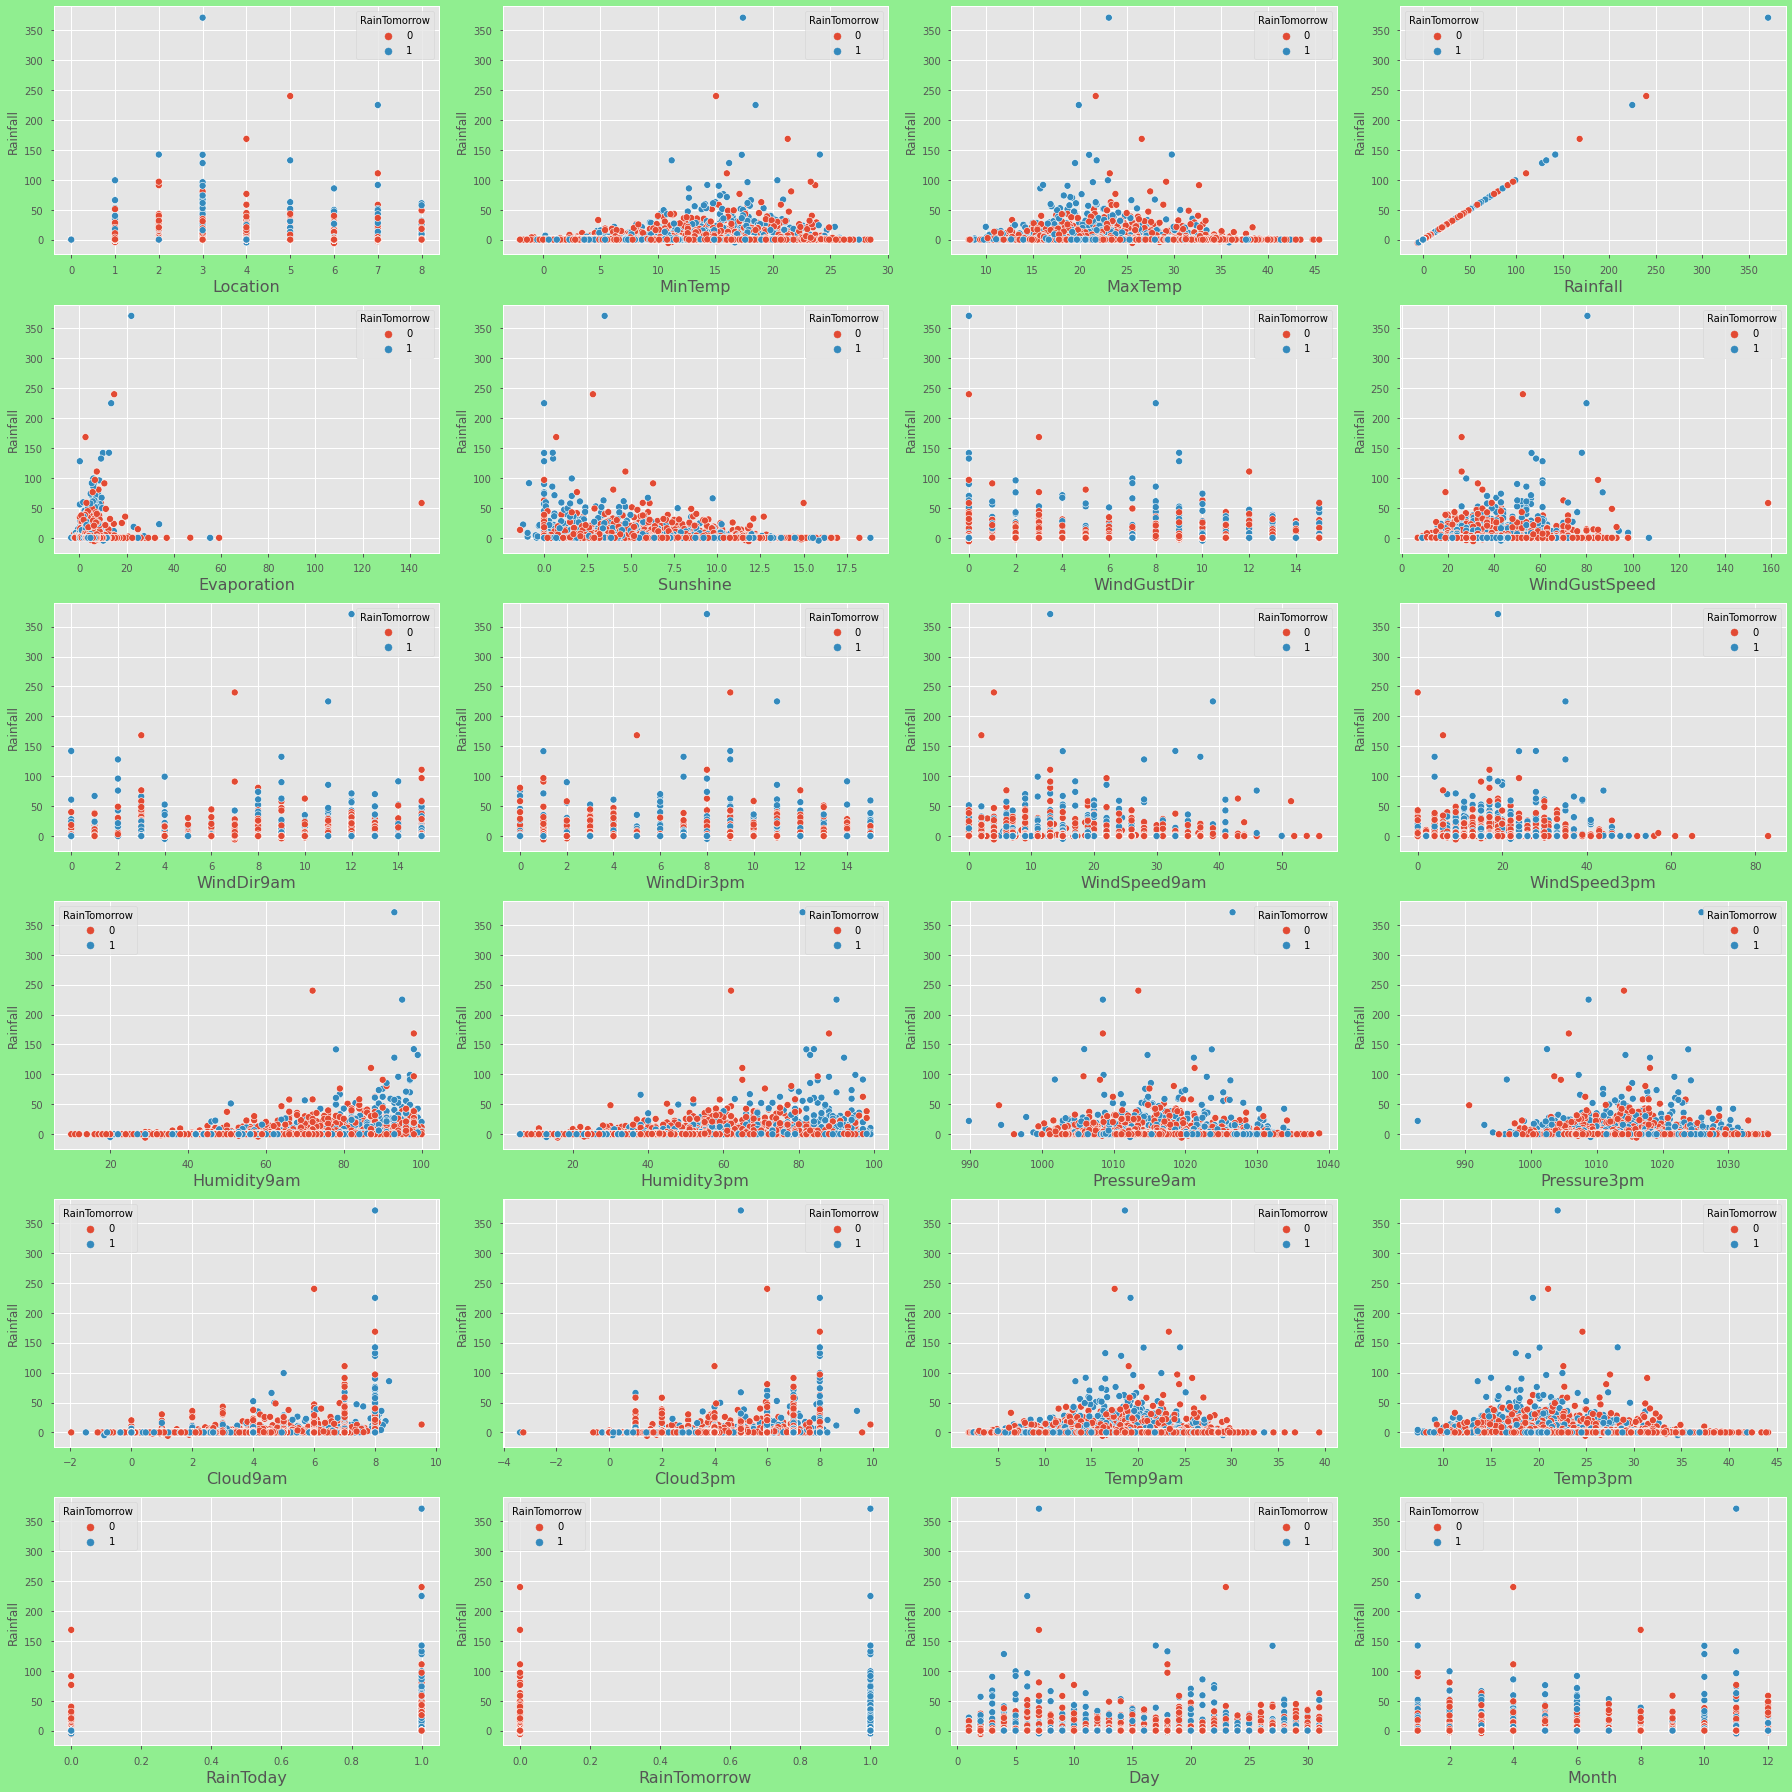

In [54]:
plt.style.use('ggplot')
plt.figure(figsize=(25,25),facecolor='lightgreen')

plotnumber=1
for column in df:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.scatterplot(df[column],df['Rainfall'],hue=df['RainTomorrow'],color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:-

1. If the temperature is between 10 to 20 the rainfall density is more as well as chance of rain tomorrow is more.

2. When the sunshine is less chance of rain for tomorrow is more also rainfall is more.

3. when windspeed at 3pm is 20 to 25 the rainfall is high and chance of rainfall for tomorrow is high.

4.  When humidity is more chance of rainfall is high.

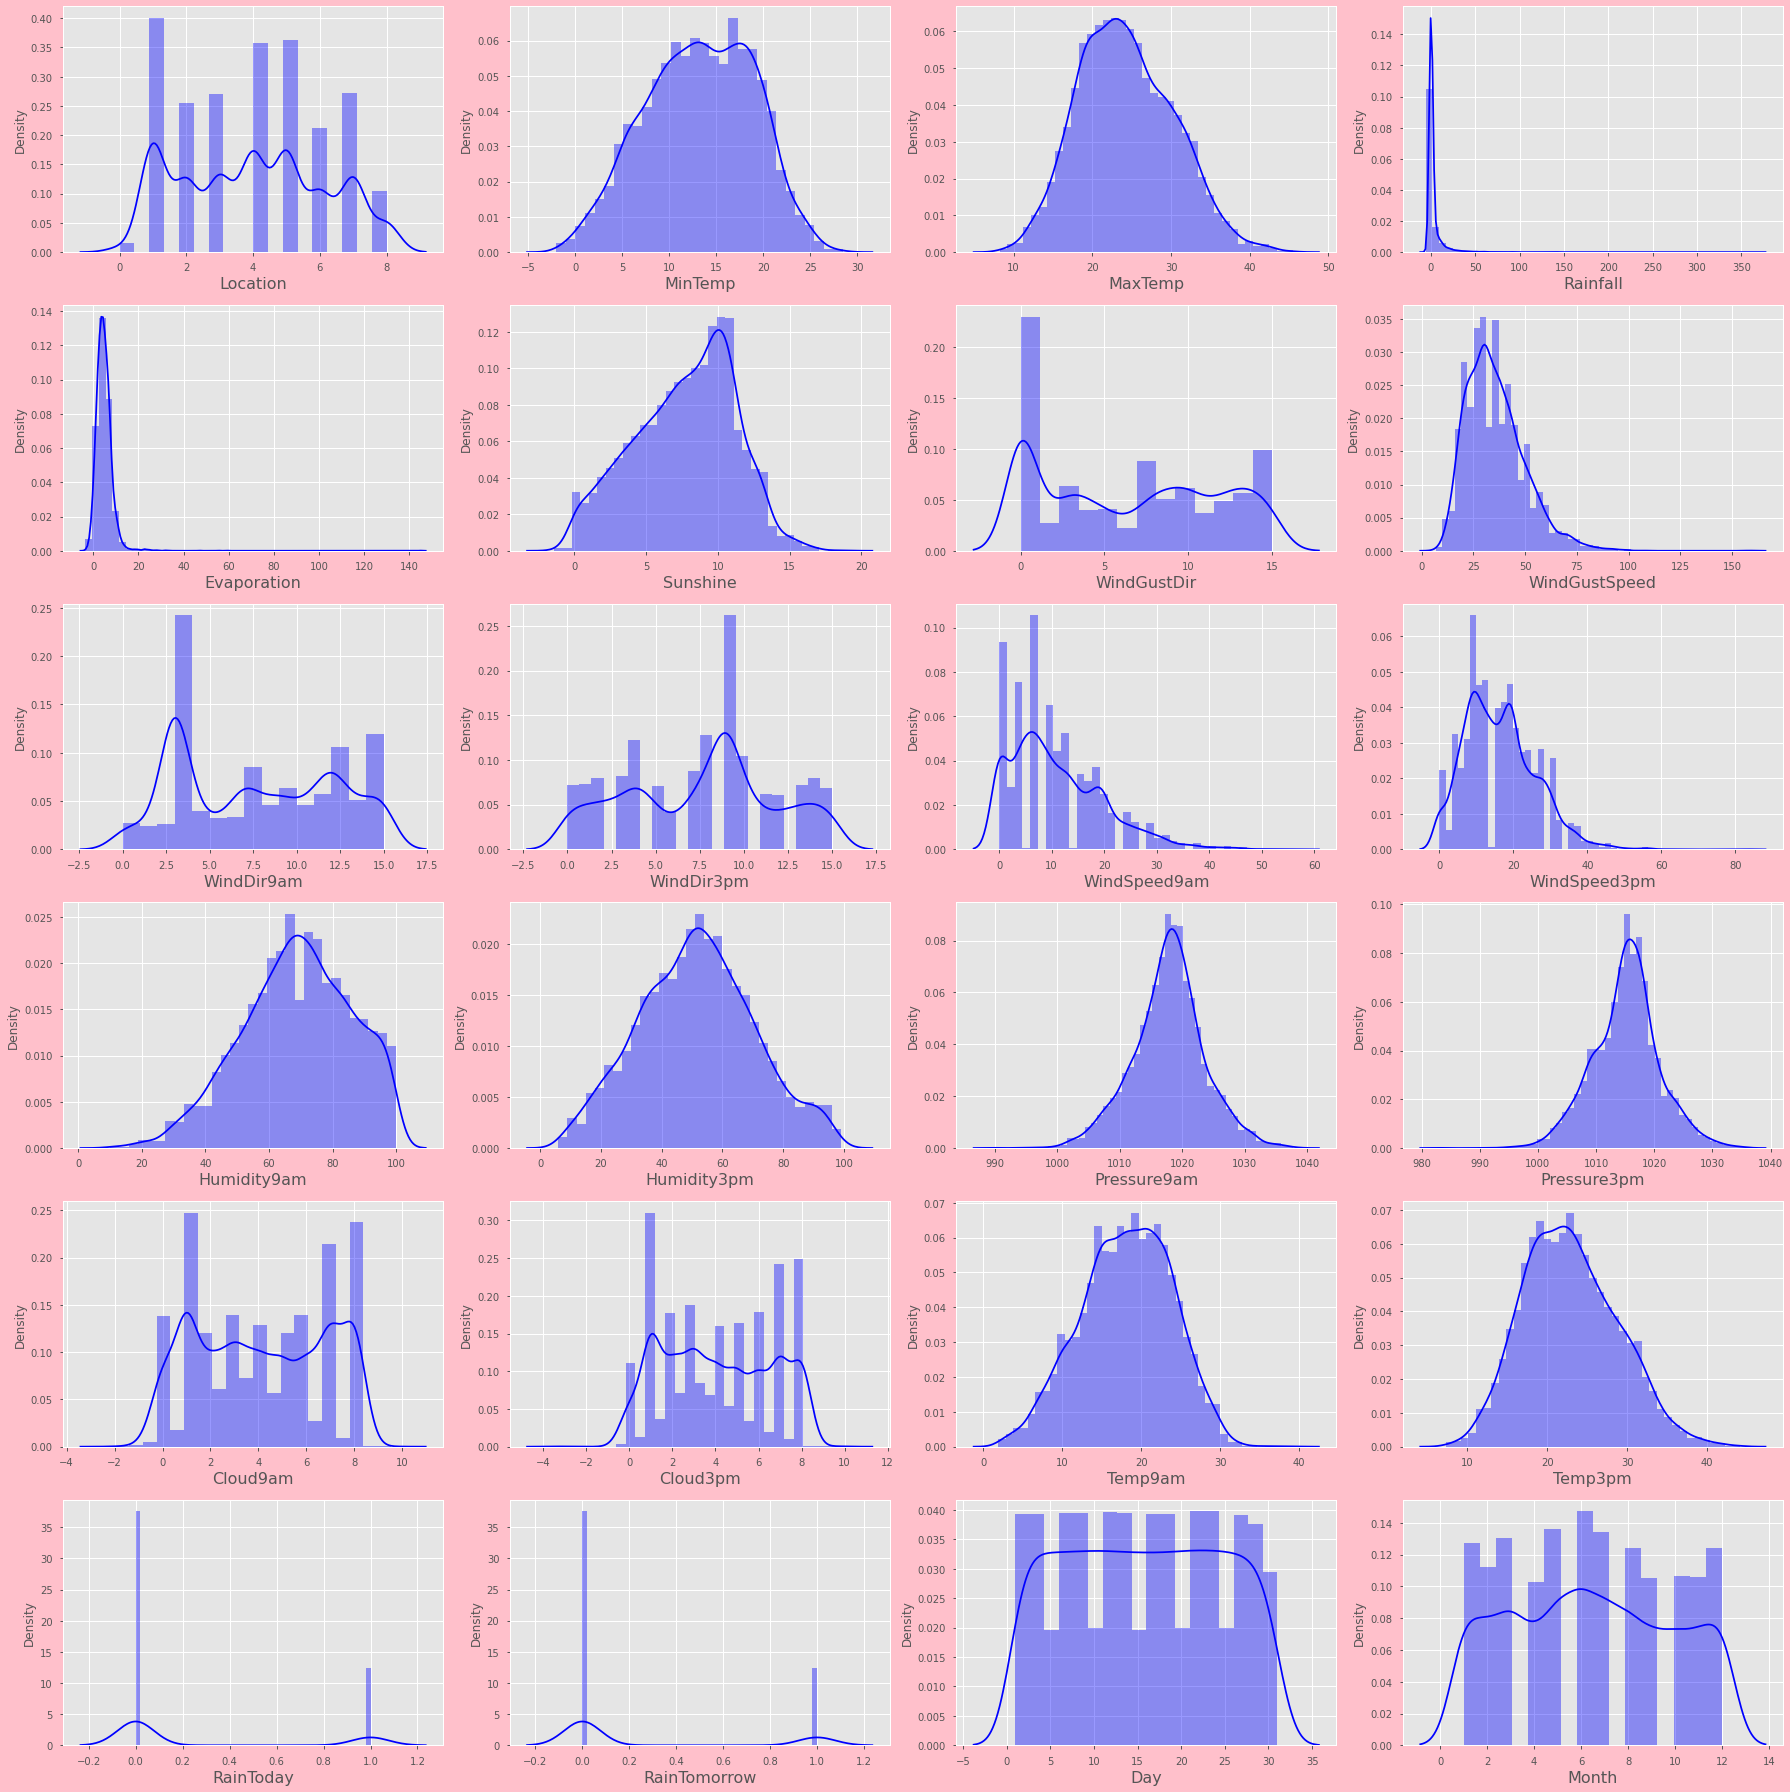

In [55]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- many features are skewed..

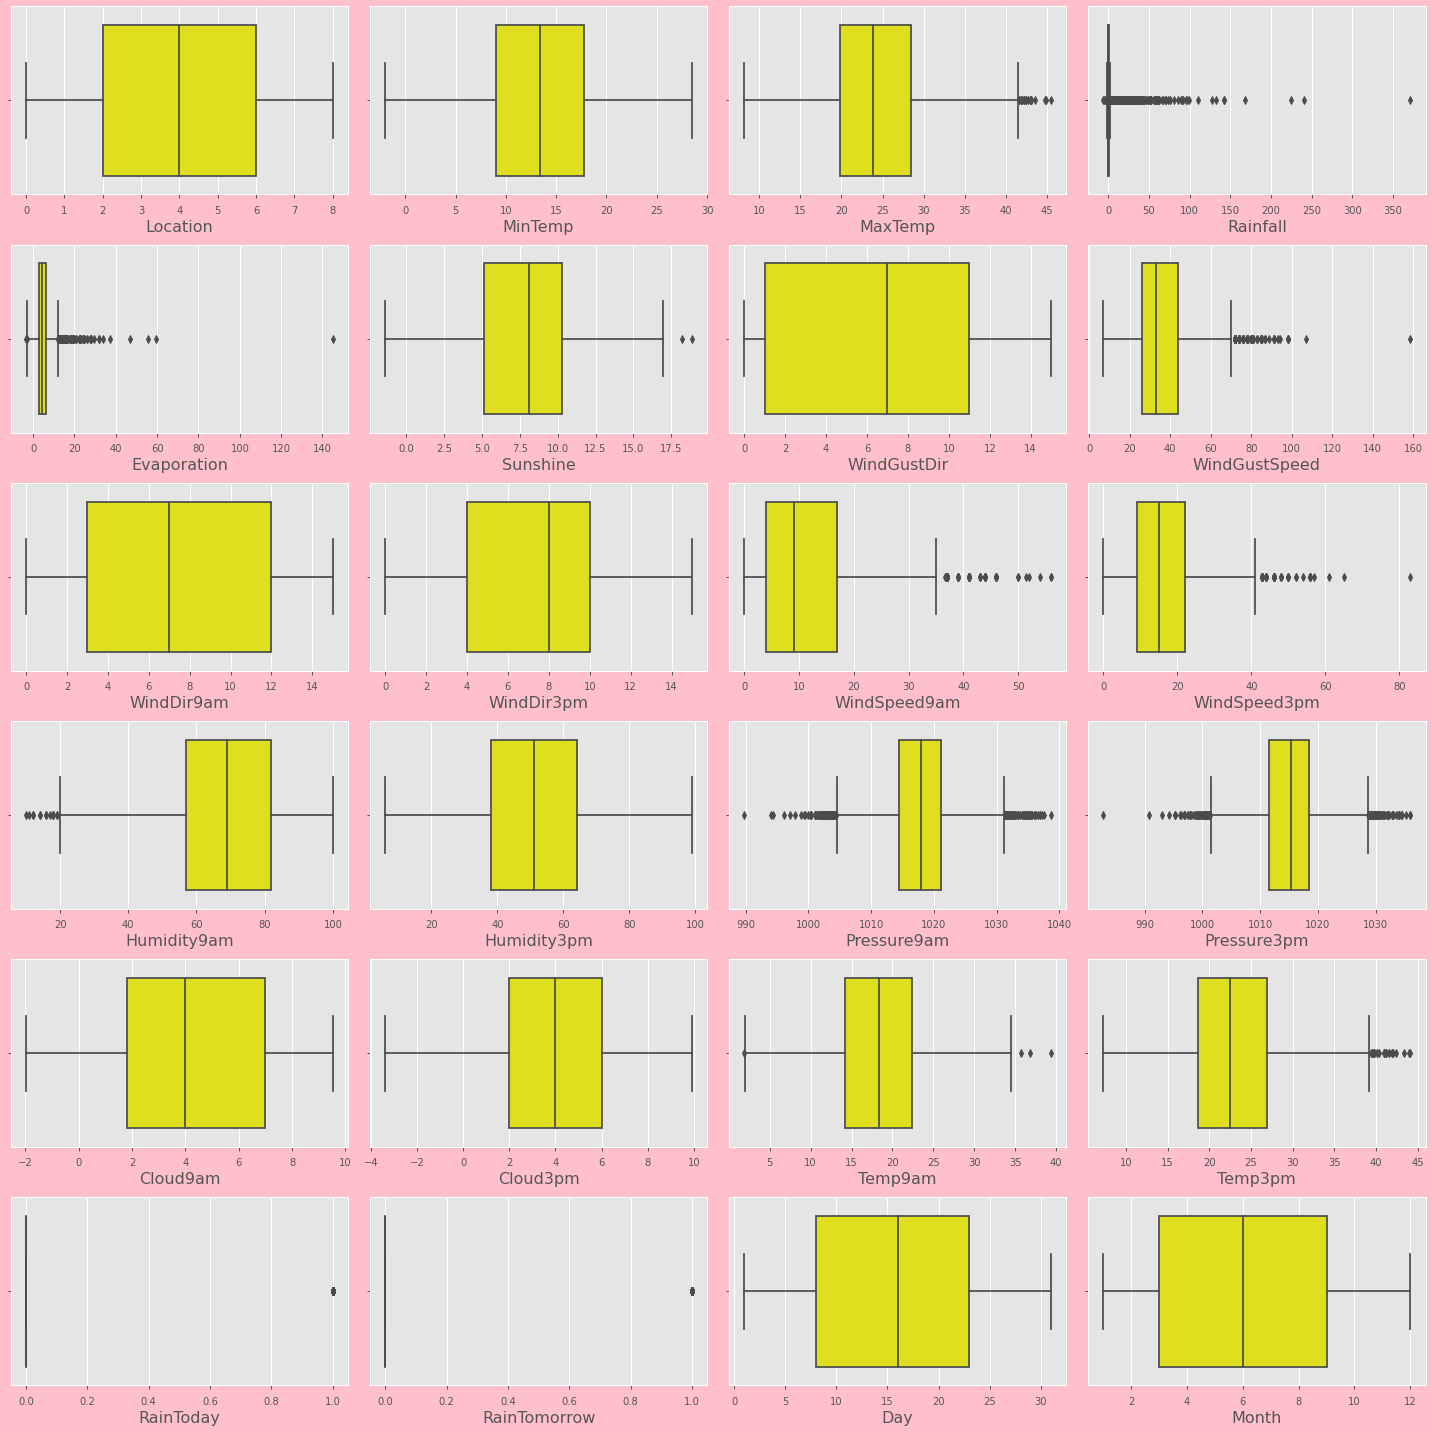

In [56]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='yellow')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Clearly some outliers are there in the features we have to treat them first..

In [57]:
from scipy.stats import zscore
df.shape

(5099, 24)

In [58]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [59]:
df.shape

(4857, 24)

In [60]:
data_loss=5099-4857
print(data_loss)

242


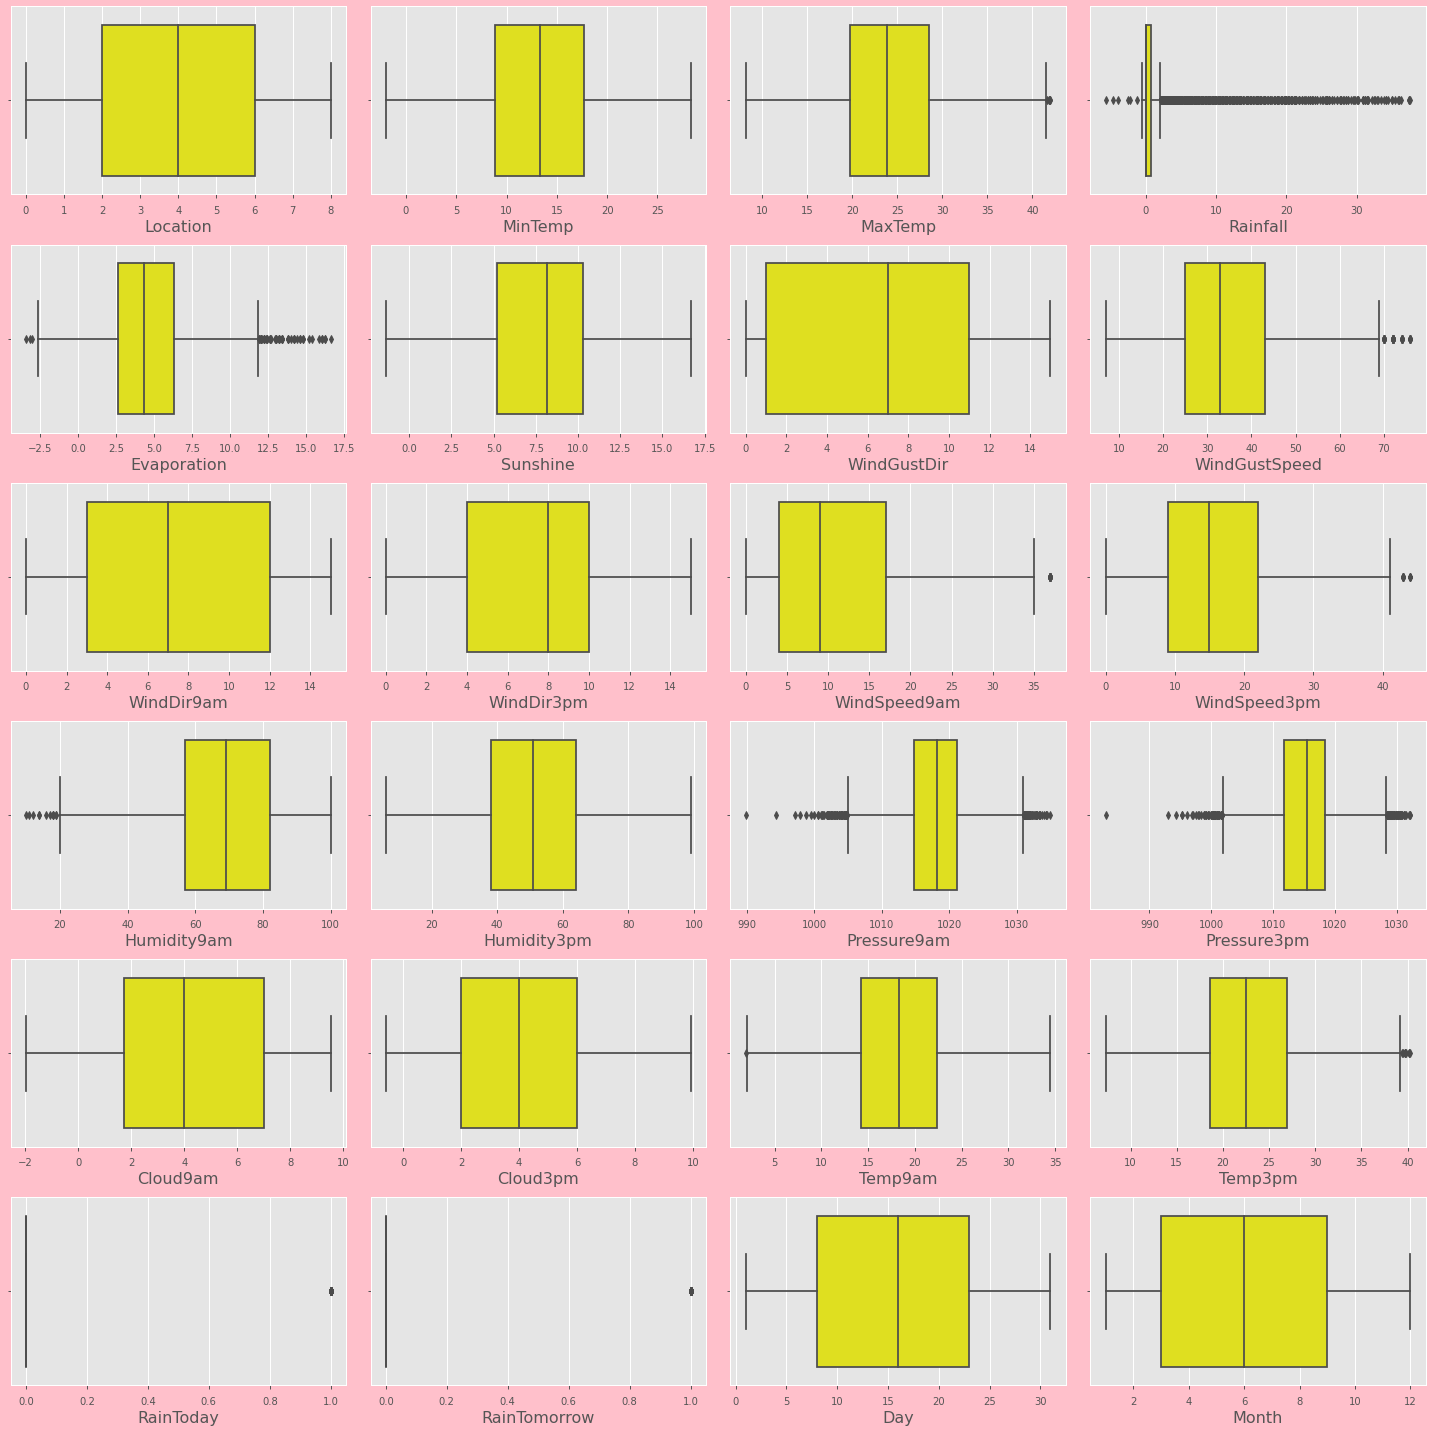

In [61]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='yellow')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- The outliers is reduced.

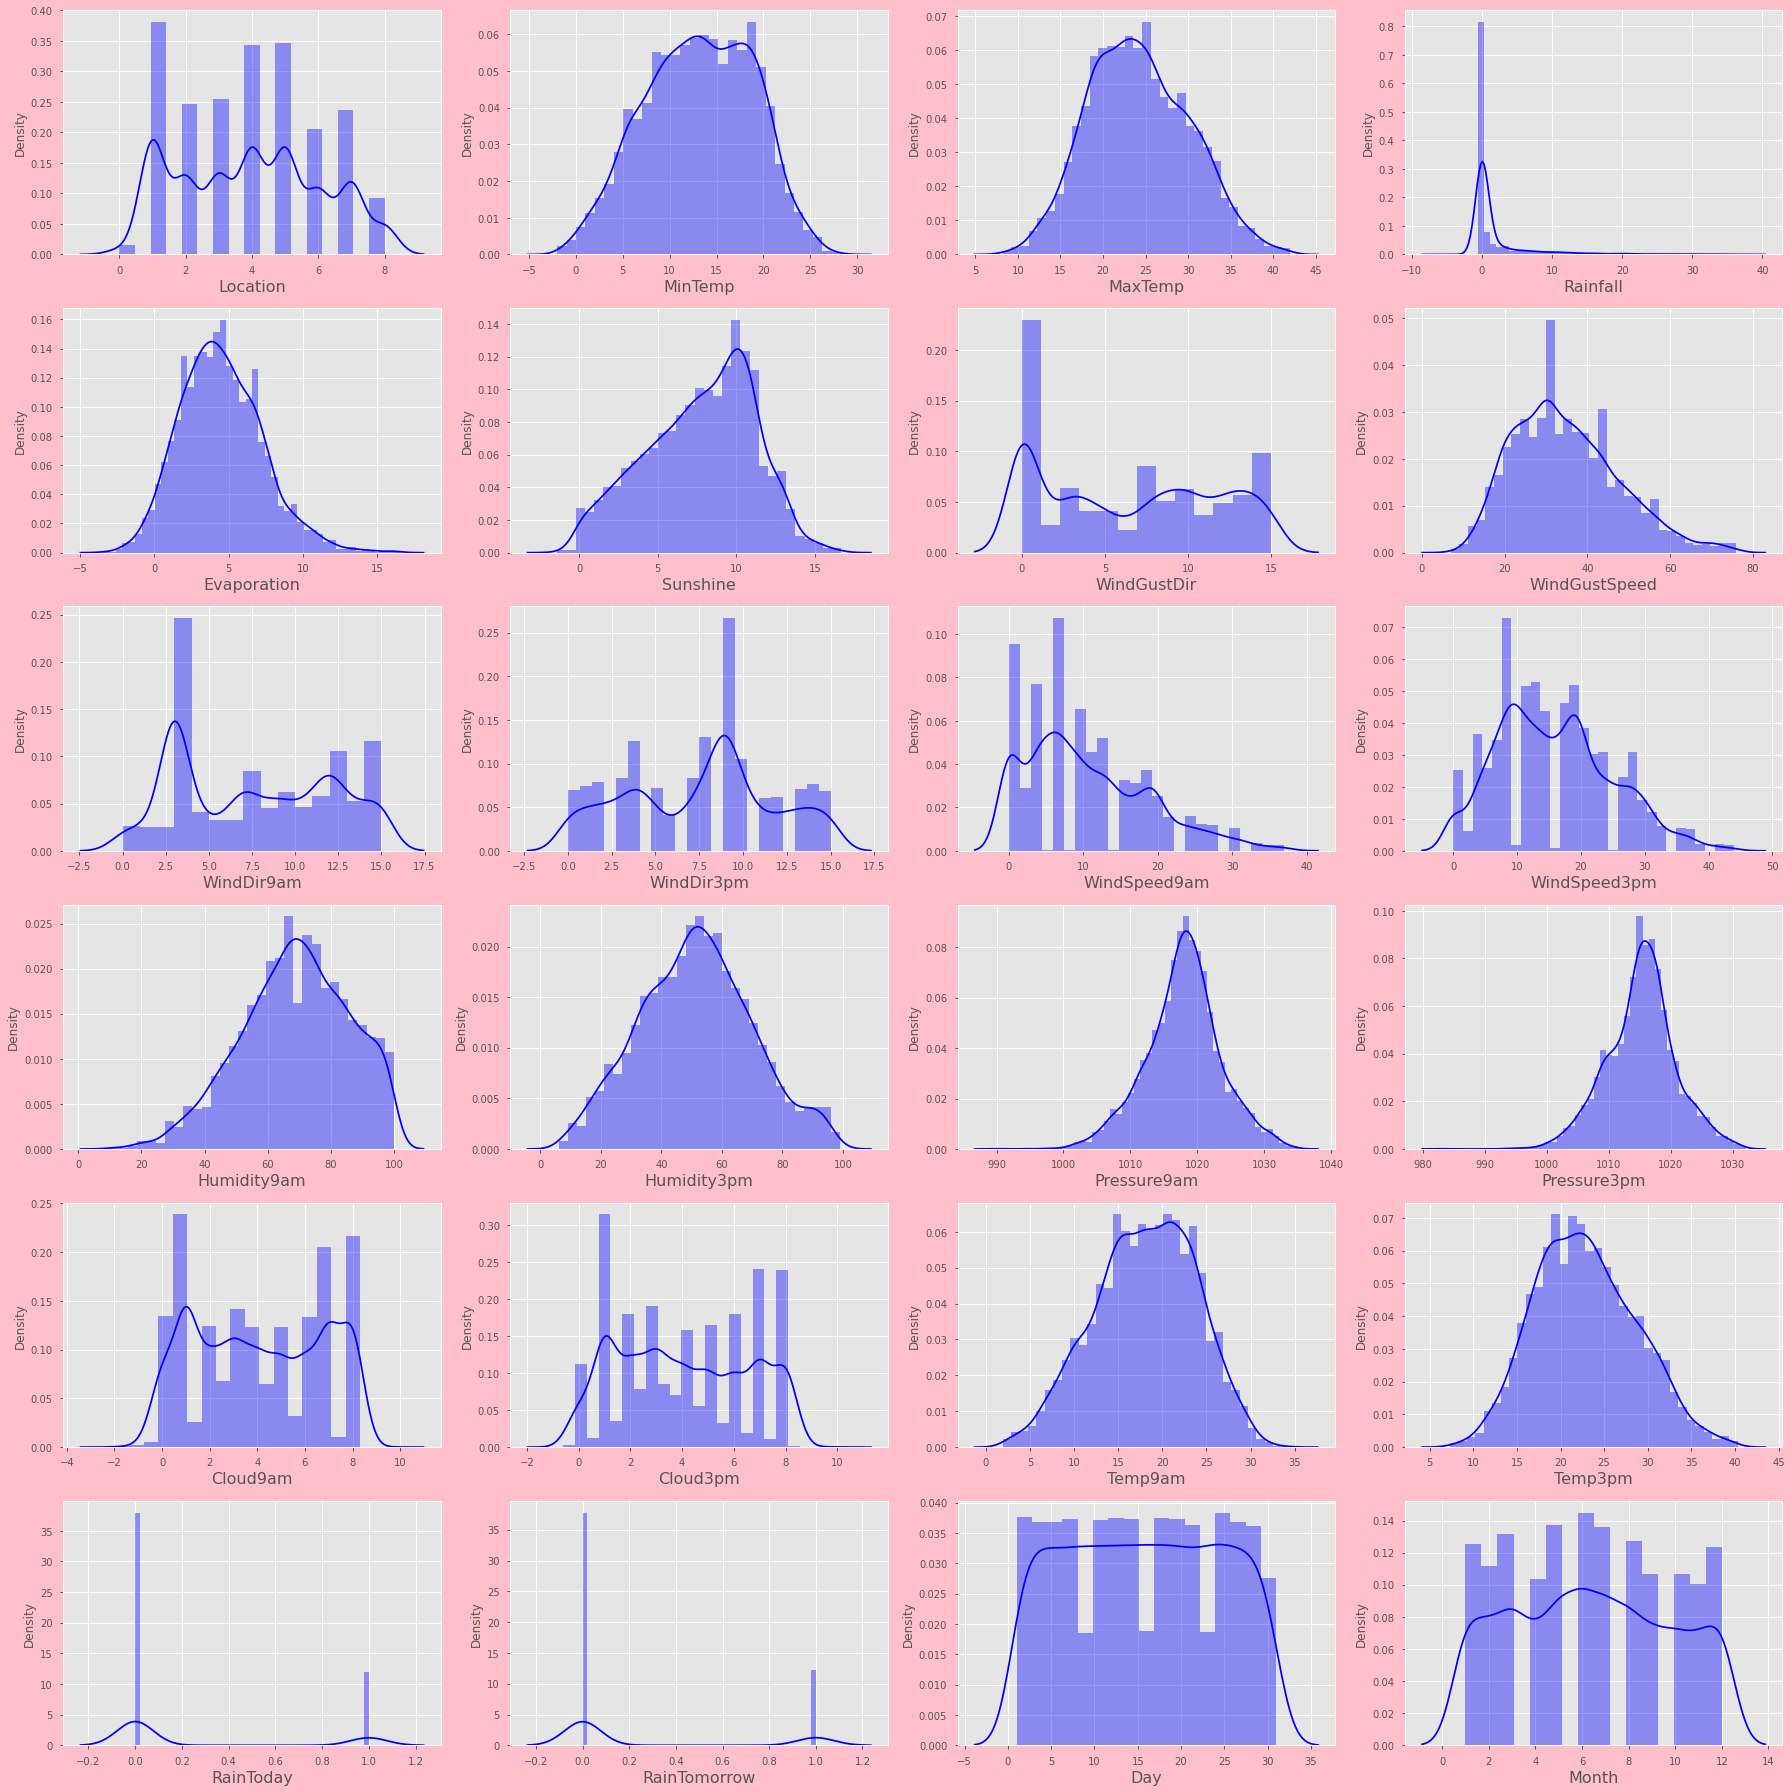

In [62]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


In [63]:
df.skew()

Location         0.115641
MinTemp         -0.133706
MaxTemp          0.201977
Rainfall         3.635797
Evaporation      0.476549
Sunshine        -0.309596
WindGustDir      0.093294
WindGustSpeed    0.598216
WindDir9am       0.122166
WindDir3pm      -0.081077
WindSpeed9am     0.745729
WindSpeed3pm     0.419888
Humidity9am     -0.304123
Humidity3pm      0.091534
Pressure9am     -0.163534
Pressure3pm     -0.142475
Cloud9am         0.022466
Cloud3pm         0.113017
Temp9am         -0.196844
Temp3pm          0.246867
RainToday        1.216194
RainTomorrow     1.191313
Day              0.004206
Month            0.055150
dtype: float64

## Lets separate target variable and features

In [64]:
X=df.drop('RainTomorrow',axis=1)
y=df.RainTomorrow

In [65]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)



In [66]:
skew=['Rainfall']

In [67]:
X[skew]=pd.DataFrame(pt.fit_transform(df[skew].values))

In [68]:
X[skew].skew()

Rainfall   -5.22692
dtype: float64

In [69]:
X.skew()

Location         0.109204
MinTemp         -0.183103
MaxTemp          0.219571
Rainfall        -5.226920
Evaporation      0.485607
Sunshine        -0.119411
WindGustDir      0.106764
WindGustSpeed    0.563606
WindDir9am       0.153756
WindDir3pm      -0.088972
WindSpeed9am     0.707517
WindSpeed3pm     0.387662
Humidity9am     -0.423520
Humidity3pm     -0.022730
Pressure9am     -0.096192
Pressure3pm     -0.093800
Cloud9am        -0.190953
Cloud3pm        -0.132426
Temp9am         -0.178372
Temp3pm          0.267902
RainToday        1.109874
Day              0.025992
Month            0.128306
dtype: float64

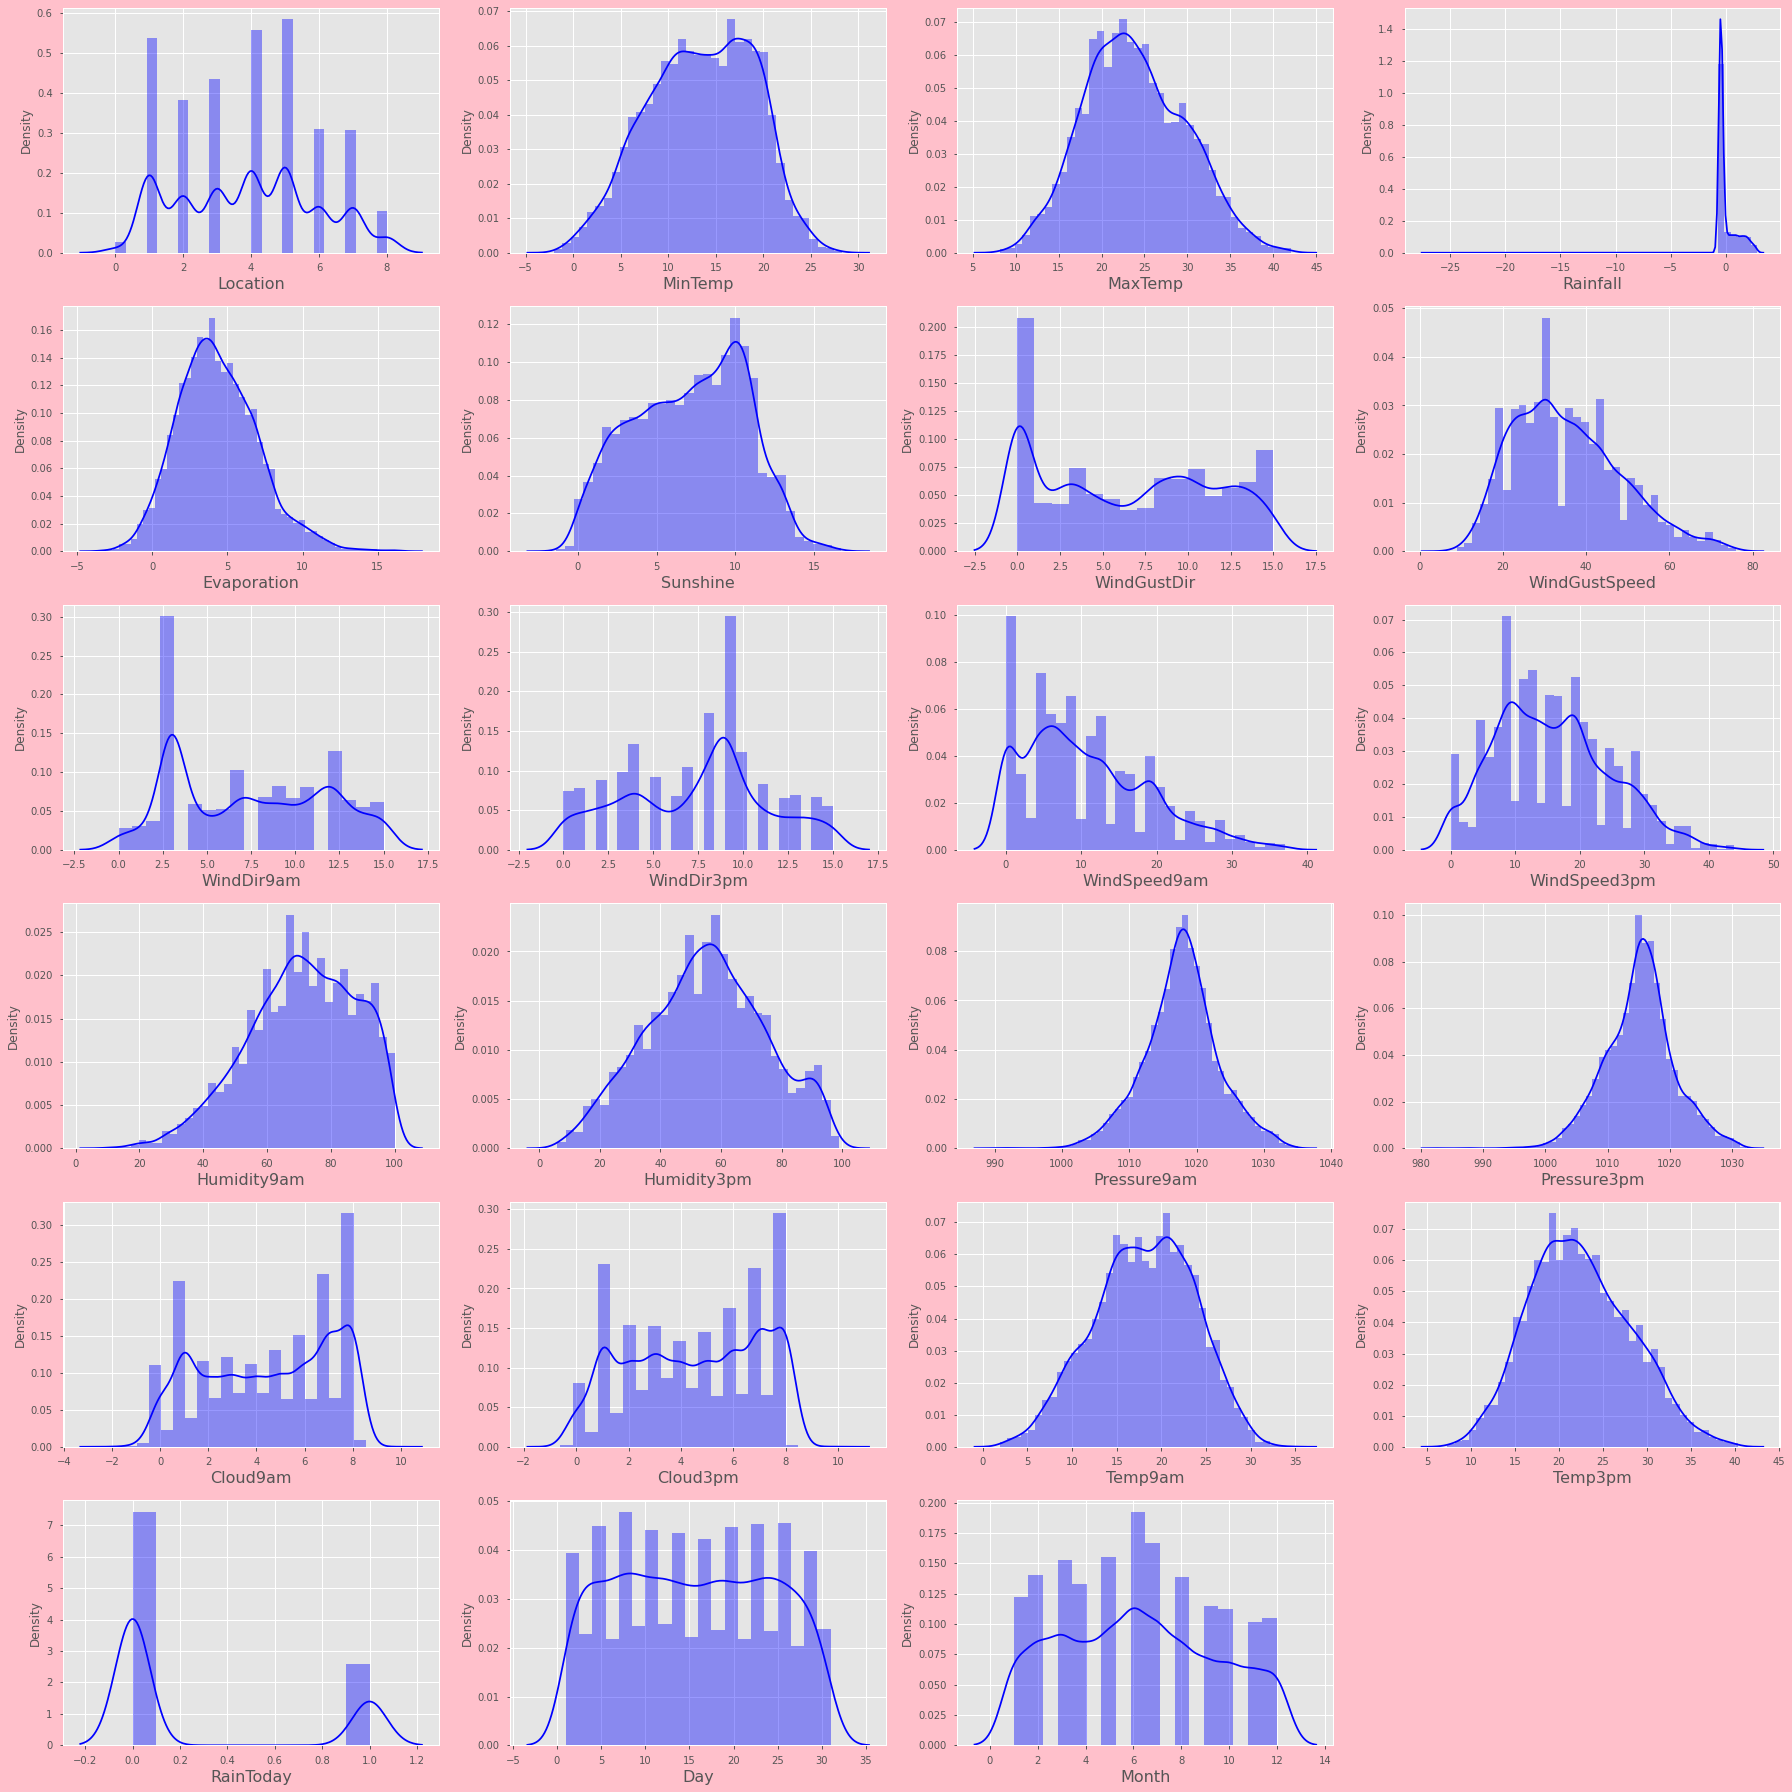

In [70]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in X:
    if plotnumber <= 24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(X[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


<AxesSubplot:>

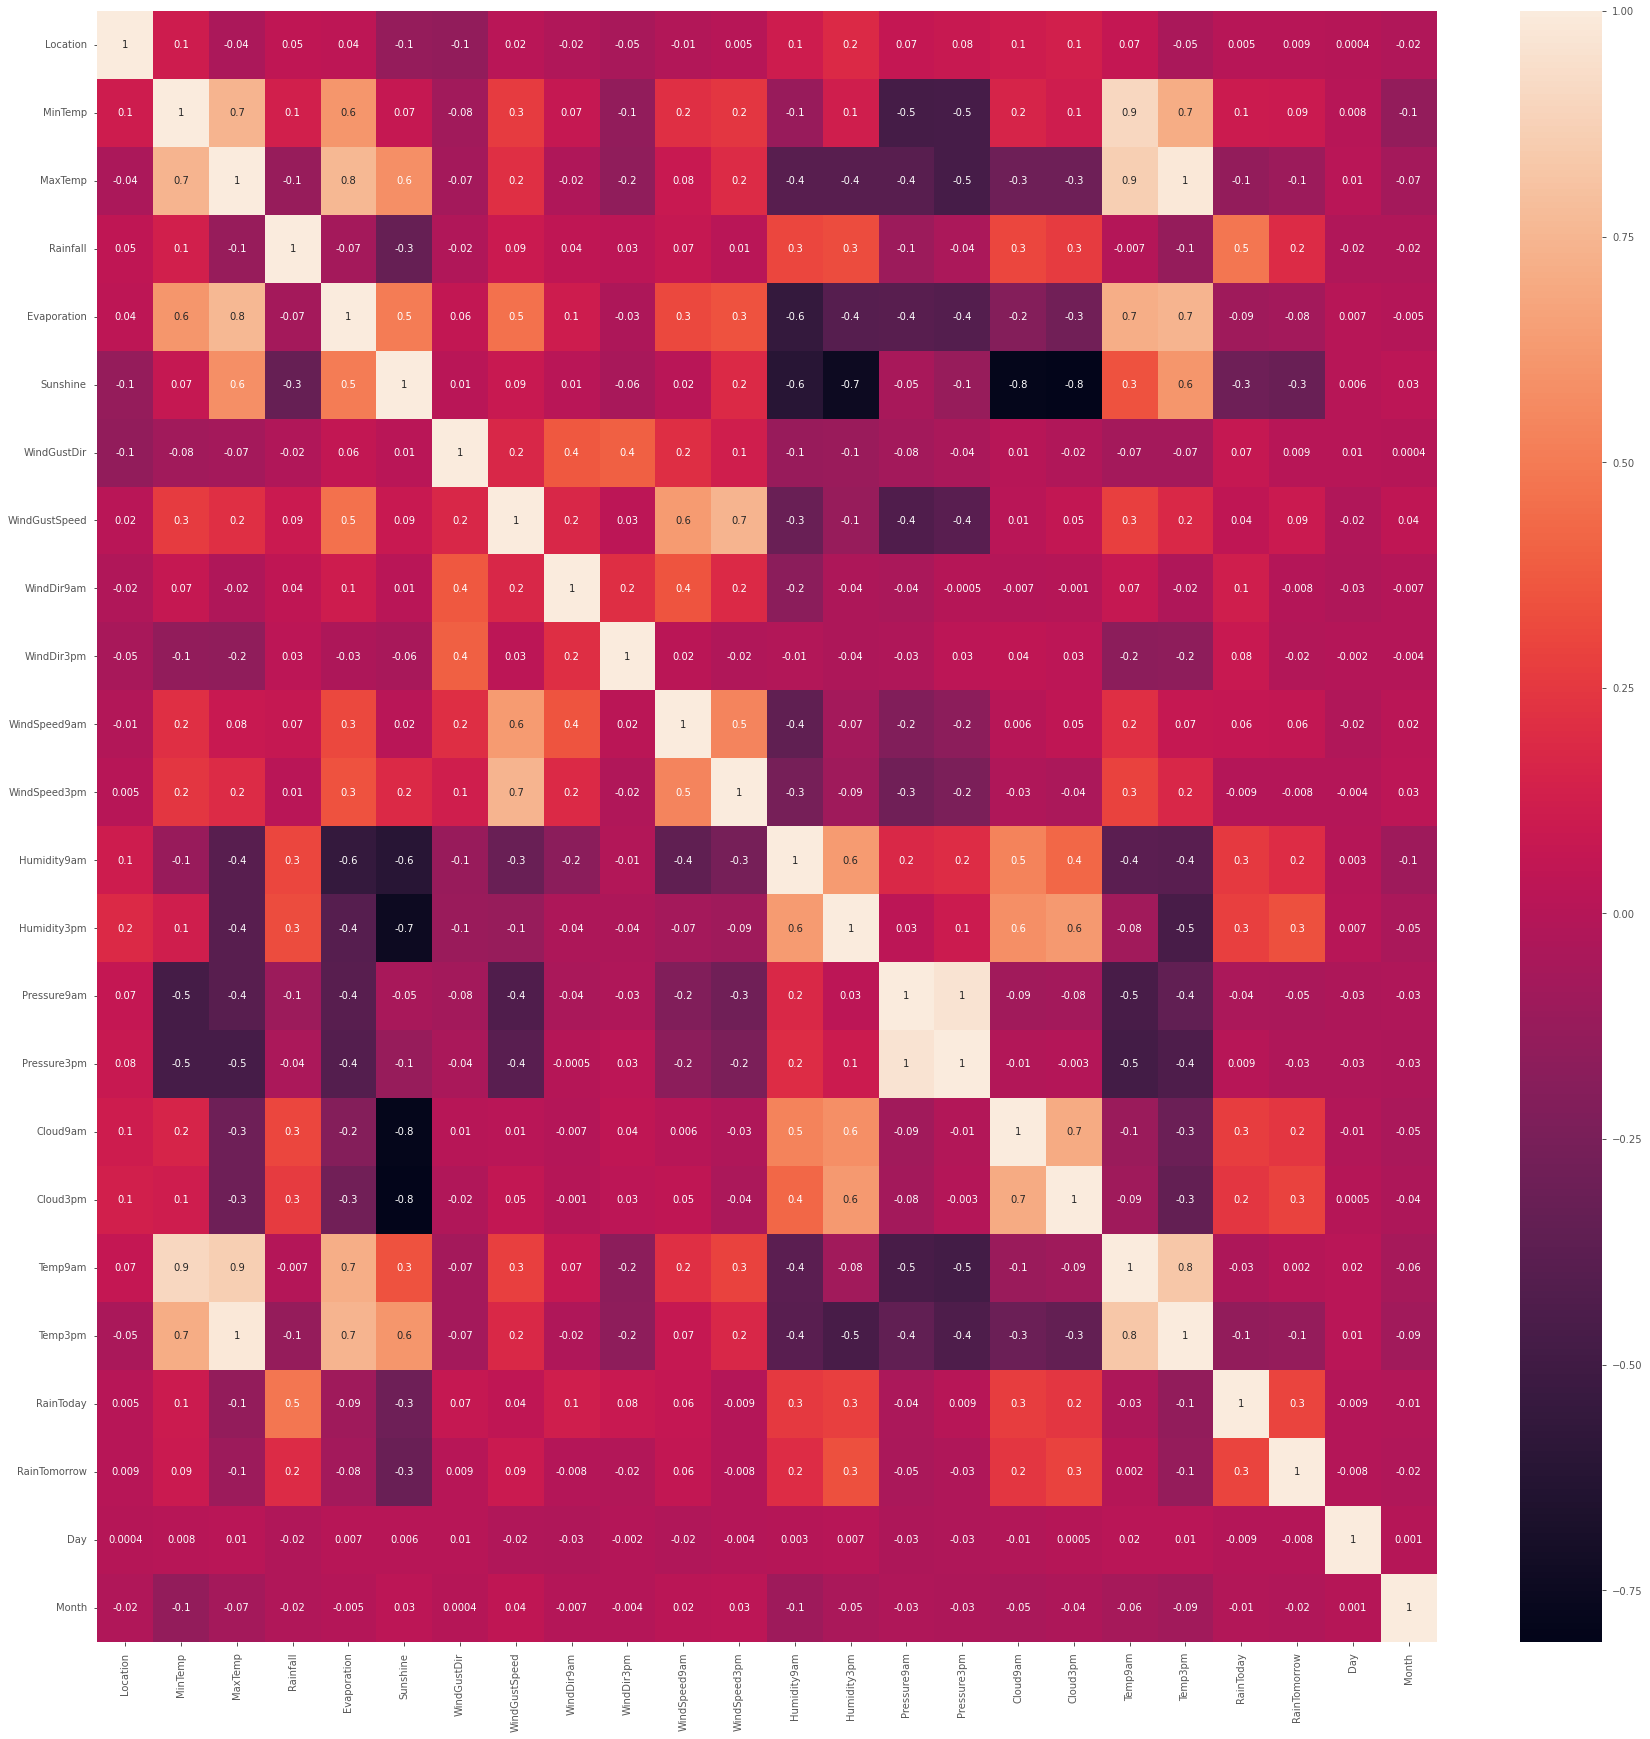

In [71]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


### Observation:- Since skewness is present we will check through vif

<AxesSubplot:title={'center':'Correlation with Target'}>

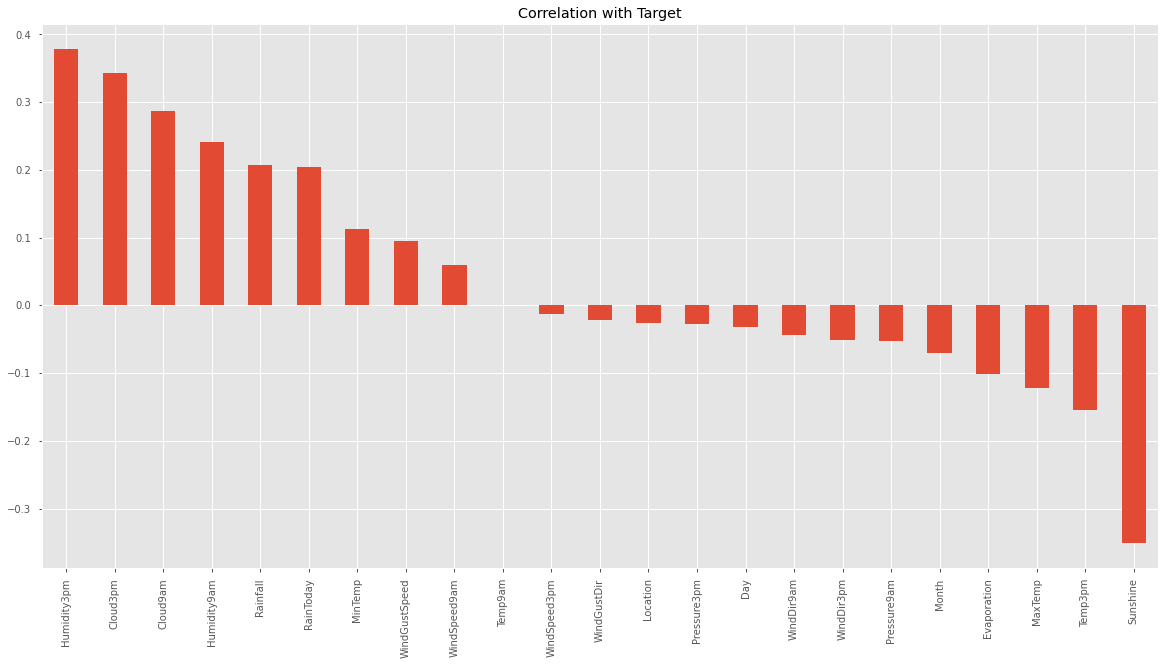

In [72]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
X.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall         2485
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
Day                 0
Month               0
dtype: int64

In [75]:
X.drop('Rainfall',axis=1,inplace=True)


In [76]:
X.isna().sum()


Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Day              0
Month            0
dtype: int64

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [78]:
scaler=StandardScaler()


In [79]:
x_scaled=scaler.fit_transform(X)


In [80]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.142734,Location
1,13.706684,MinTemp
2,38.145057,MaxTemp
3,4.764204,Evaporation
4,12.075733,Sunshine
5,1.399180,WindGustDir
6,3.863724,WindGustSpeed
7,1.391239,WindDir9am
8,1.282010,WindDir3pm
9,2.358778,WindSpeed9am


In [81]:
from sklearn.decomposition import PCA

In [82]:

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 1.06450525,  1.09715629,  2.91440749, ...,  0.2778369 ,
        -0.04674699,  0.1795388 ],
       [ 2.49229594, -2.07180715,  2.03214801, ...,  0.1202103 ,
        -0.00505279, -0.12663701],
       [ 3.37820881, -0.65998611,  3.38660293, ...,  0.16295704,
        -0.31637034,  0.02296987],
       ...,
       [-2.72690355,  0.16231635,  0.39855102, ..., -0.05375522,
        -0.0592219 ,  0.07242444],
       [-1.28430123,  1.64873146,  0.97609326, ...,  0.02084063,
         0.0160106 , -0.03686039],
       [-2.1347676 ,  0.29381988,  1.52973181, ..., -0.11270141,
         0.26709733,  0.0258627 ]])

Text(0.5, 1.0, 'PCA')

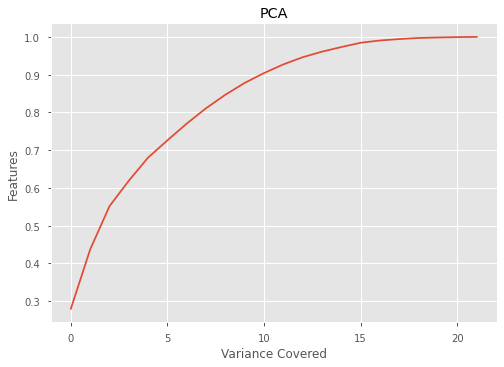

In [83]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Variance Covered')
plt.ylabel('Features')
plt.title('PCA')

In [84]:
X.shape

(7342, 22)

### Since 20 features covers maximum variance we will consider that

In [85]:
pca=PCA(n_components=20)
comp=pca.fit_transform(x_scaled)
pc=pd.DataFrame(comp,columns=['PC'+str(i) for i in range(1,21)])

In [86]:
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.064505,1.097156,2.914407,1.763494,1.594140,-1.210367,1.757788,-0.713662,-1.099120,0.342454,-0.228320,0.477144,1.388044,-0.957571,0.232826,-1.007305,0.003026,-0.497235,-0.394804,0.277837
1,2.492296,-2.071807,2.032148,2.409819,1.661923,-1.023182,1.884743,-0.936618,0.147779,1.194703,0.095157,0.427116,-0.012025,0.849959,-0.081585,-0.108039,0.007376,0.067766,0.077007,0.120210
2,3.378209,-0.659986,3.386603,1.455299,1.712336,-0.827191,1.806158,-0.535392,-0.656773,0.233238,-0.612270,0.379896,-0.250855,0.254077,-0.362306,-0.404791,0.152140,-0.170597,-0.275716,0.162957
3,2.473527,-3.186619,-0.314159,1.413652,-0.555417,-1.478577,1.475674,1.283320,-0.952309,-1.212182,-0.069194,-0.598801,0.372430,-0.196987,0.188308,-0.271979,0.193275,0.008903,0.028337,0.080263
4,1.520336,1.611206,-0.418122,2.239762,0.776994,-1.219329,1.467703,-0.238391,-1.287942,1.811122,1.575878,-0.165186,0.905528,-0.232708,1.297976,-0.540517,0.378213,-0.301012,0.076933,-0.440513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,-1.235676,2.320995,1.500095,-1.899912,0.408219,1.132165,-0.106000,-1.562246,-0.528087,0.805775,-0.440448,0.204968,0.434127,0.159696,-0.773726,2.674074,0.375729,0.367122,0.041947,0.230159
7338,3.139308,1.681048,-0.291134,-0.371442,0.035507,0.123497,-1.283963,0.010591,-0.820780,-0.081117,0.721223,0.338445,-0.386726,0.973470,-0.383227,0.272739,0.047670,0.472064,-0.408364,-0.046800
7339,-2.726904,0.162316,0.398551,0.769756,-1.024633,1.083675,-0.545050,-0.733499,0.193358,-0.039465,-0.630504,0.976107,1.047225,0.486487,-0.147351,-0.130278,0.061049,0.228586,0.077793,-0.053755
7340,-1.284301,1.648731,0.976093,0.156070,-0.246378,-1.309173,1.129070,-0.291319,-1.467905,-0.679321,0.127515,0.293725,0.352544,-0.822242,0.392326,-0.251441,-0.034107,-0.364099,0.352957,0.020841


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve
from sklearn.model_selection import cross_val_score

In [88]:
x_train,x_test,y_train,y_test=train_test_split(pc,y,test_size=0.30,random_state=432)


In [89]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print(accuracy_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print(accuracy_score(y_test,y_pred)*100)
        print(classification_report(y_test,y_pred))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')
        print('*'*100)
        print('cross_val_score',cross_val_score(clf,pc,y,cv=5).mean())


# Logistic Regression

In [90]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [91]:
model(lr,x_train,x_test,y_train,y_test,train=True)

69.58552247518972


69.6323195642306
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1117
           1       0.70      0.67      0.69      1086

    accuracy                           0.70      2203
   macro avg       0.70      0.70      0.70      2203
weighted avg       0.70      0.70      0.70      2203

****************************************************************************************************
cross_val_score 0.5788807006935338


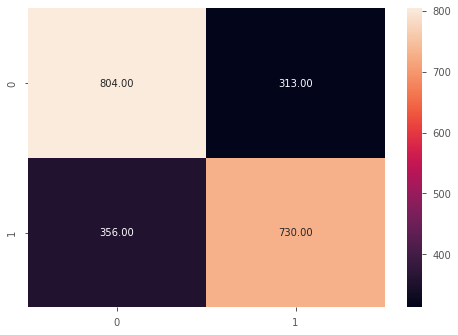

In [92]:
model(lr,x_train,x_test,y_train,y_test,train=False)

# KNN

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
model(knn,x_train,x_test,y_train,y_test,train=True)

84.54952325355127


77.2582841579664
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1117
           1       0.71      0.92      0.80      1086

    accuracy                           0.77      2203
   macro avg       0.80      0.77      0.77      2203
weighted avg       0.80      0.77      0.77      2203

****************************************************************************************************
cross_val_score 0.6359336366654733


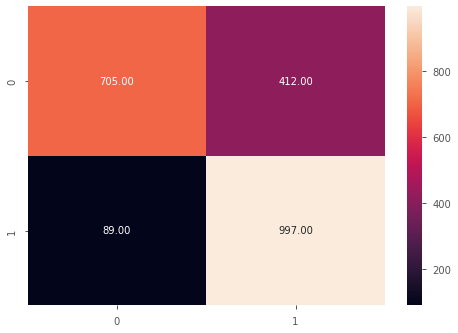

In [96]:
model(knn,x_train,x_test,y_train,y_test,train=False)

# Decision Tree

In [97]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
model(dt,x_train,x_test,y_train,y_test,train=True)

100.0


71.72038129822968
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1117
           1       0.69      0.76      0.73      1086

    accuracy                           0.72      2203
   macro avg       0.72      0.72      0.72      2203
weighted avg       0.72      0.72      0.72      2203

****************************************************************************************************
cross_val_score 0.6491525125064225


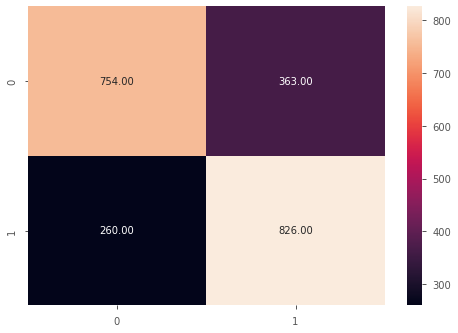

In [99]:
model(dt,x_train,x_test,y_train,y_test,train=False)

# Random Forest

In [100]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
model(rf,x_train,x_test,y_train,y_test,train=True)

100.0


84.0671811166591
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1117
           1       0.83      0.85      0.84      1086

    accuracy                           0.84      2203
   macro avg       0.84      0.84      0.84      2203
weighted avg       0.84      0.84      0.84      2203

****************************************************************************************************
cross_val_score 0.7172609960992203


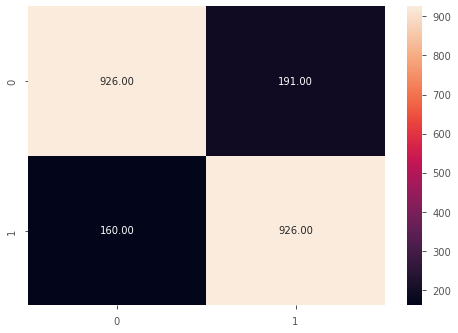

In [103]:
model(rf,x_train,x_test,y_train,y_test,train=False)

# XGBoost

In [104]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [105]:
model(xgb,x_train,x_test,y_train,y_test,train=True)

99.82486865148861


81.75215615070358
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1117
           1       0.80      0.85      0.82      1086

    accuracy                           0.82      2203
   macro avg       0.82      0.82      0.82      2203
weighted avg       0.82      0.82      0.82      2203

****************************************************************************************************
cross_val_score 0.6588351823238853


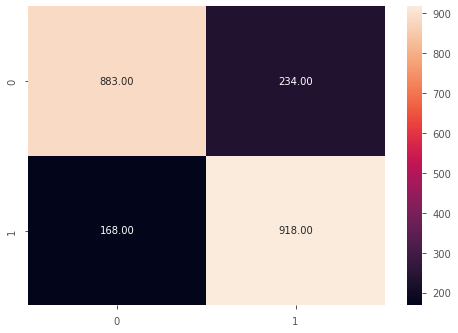

In [106]:
model(xgb,x_train,x_test,y_train,y_test,train=False)

# Conclusion:- Since Random Forest performs better with accuracy so considering this model.

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
# Random Forest
params={'n_estimators':[100],
       'criterion':['gini'],
       'max_depth':[4,5,6,7,8,9],
       'min_samples_split':[3,4,5,6,7],
       'min_samples_leaf':[3,4,5,7,9]}


In [110]:
rd=RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1)

In [111]:
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 7, 9],
                                        'min_samples_split': [3, 4, 5, 6, 7],
                                        'n_estimators': [100]})

In [112]:
rd.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'criterion': 'gini'}

In [119]:
rf= RandomForestClassifier(n_estimators=100,min_samples_split=7,min_samples_leaf=3,max_depth=9,criterion='gini')
rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=7)

In [120]:
model(rf,x_train,x_test,y_train,y_test,train=True)

88.75267561782448


77.12210621879255
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1117
           1       0.78      0.75      0.76      1086

    accuracy                           0.77      2203
   macro avg       0.77      0.77      0.77      2203
weighted avg       0.77      0.77      0.77      2203

****************************************************************************************************
cross_val_score 0.646570912389195


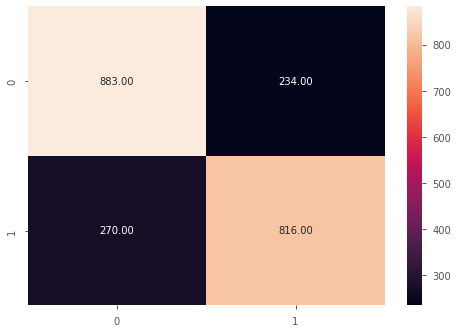

In [121]:
model(rf,x_train,x_test,y_train,y_test,train=False)

In [122]:
y_pred=rf.predict(x_test)


In [123]:
Pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [124]:
Pred

,Actual,Predicted
2619,0,0
3892,0,0
4578,1,1
3551,0,0
5011,1,1
...,...,...
5240,1,1
6633,1,1
311,0,0
6093,1,0


Text(0.5, 1.0, 'Actual vs Predicted')

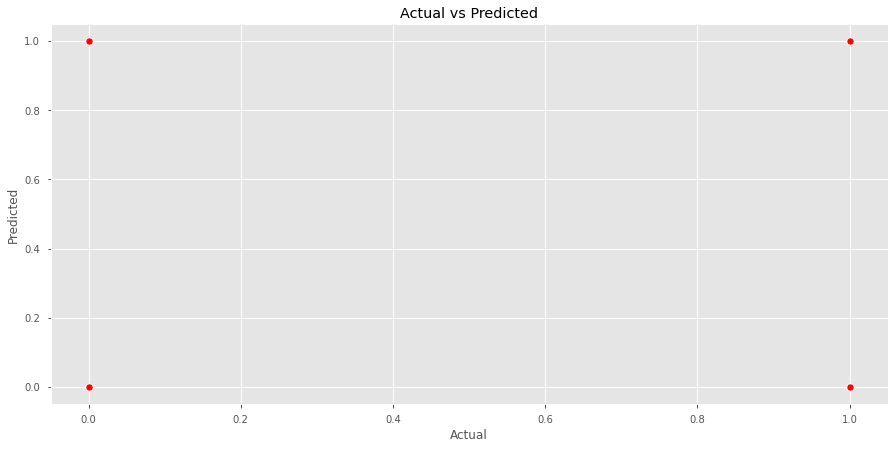

In [126]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


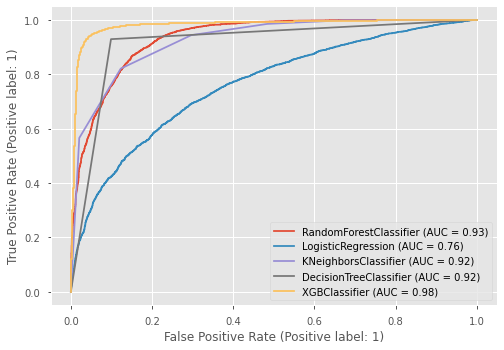

In [127]:
disp=plot_roc_curve(rf,pc,y)
plot_roc_curve(lr,pc,y,ax=disp.ax_)
plot_roc_curve(knn,pc,y,ax=disp.ax_)
plot_roc_curve(dt,pc,y,ax=disp.ax_)
plot_roc_curve(xgb,pc,y,ax=disp.ax_)


In [128]:
# Saving the model
import pickle
filename='Rainfall_prediction'
pickle.dump(rf,open(filename,'wb'))


# Regression

In [129]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,1,13.4,22.900000,0.6,5.043013,6.638742,13,44.000000,13,14,...,1007.7,1007.1,8.000000,5.029625,16.9,21.8,0,0,1,12
1,1,7.4,25.100000,0.0,5.892237,12.245881,14,44.000000,6,15,...,1010.6,1007.8,0.996959,1.528732,17.2,24.3,0,0,2,12
2,1,12.9,25.700000,0.0,7.144043,11.673420,15,46.000000,13,15,...,1007.6,1008.7,2.053331,2.000000,21.0,23.2,0,0,3,12
3,1,9.2,28.000000,0.0,5.268806,12.652787,4,24.000000,9,0,...,1017.6,1012.8,0.360171,0.913110,18.1,26.5,0,0,4,12
4,1,17.5,32.300000,1.0,5.559384,6.114685,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0,2.8,23.400000,0.0,4.045590,11.486012,3,31.000000,3,3,...,1024.6,1020.3,0.606602,1.365773,10.1,22.4,0,0,7,7
6758,0,3.6,25.300000,0.0,3.696319,12.100952,14,22.000000,5,3,...,1023.5,1019.1,0.470900,0.911762,10.9,24.5,0,1,8,7
6759,0,5.4,26.900000,0.0,5.630316,11.865670,15,37.000000,11,12,...,1021.0,1016.8,0.743505,1.411992,12.5,26.1,1,1,9,7
6760,0,7.8,27.000000,0.0,5.702430,10.738197,15,28.000000,8,13,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,1,0,10,7


In [163]:
X=df.drop('Rainfall',axis=1)
y=df.Rainfall

<AxesSubplot:title={'center':'Correlation with Target'}>

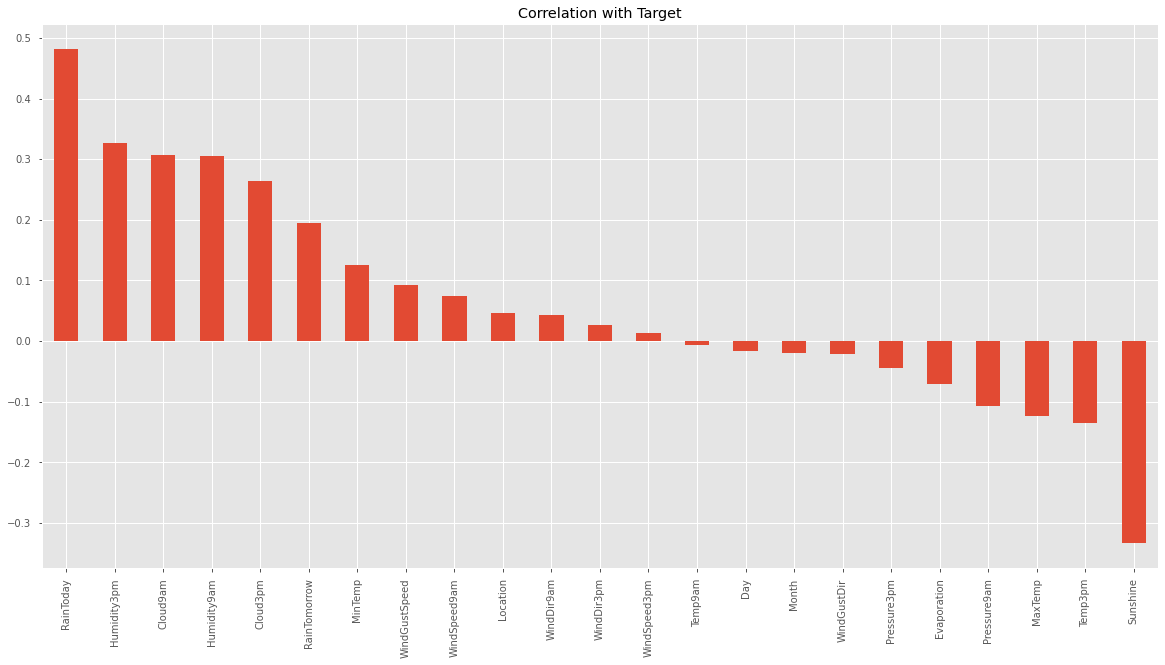

In [164]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [165]:
X.skew()

Location         0.115641
MinTemp         -0.133706
MaxTemp          0.201977
Evaporation      0.476549
Sunshine        -0.309596
WindGustDir      0.093294
WindGustSpeed    0.598216
WindDir9am       0.122166
WindDir3pm      -0.081077
WindSpeed9am     0.745729
WindSpeed3pm     0.419888
Humidity9am     -0.304123
Humidity3pm      0.091534
Pressure9am     -0.163534
Pressure3pm     -0.142475
Cloud9am         0.022466
Cloud3pm         0.113017
Temp9am         -0.196844
Temp3pm          0.246867
RainToday        1.216194
RainTomorrow     1.191313
Day              0.004206
Month            0.055150
dtype: float64

In [166]:
x_scaled=scaler.fit_transform(X)


In [167]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.139894,Location
1,12.469149,MinTemp
2,38.160025,MaxTemp
3,4.323087,Evaporation
4,10.404935,Sunshine
5,1.400262,WindGustDir
6,3.768379,WindGustSpeed
7,1.359969,WindDir9am
8,1.285880,WindDir3pm
9,2.217181,WindSpeed9am


In [168]:
X.drop(columns=['MinTemp','MaxTemp','Temp3pm'],axis=1,inplace=True)

In [169]:
x_scaled=scaler.fit_transform(X)

In [170]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.108090,Location
1,3.820102,Evaporation
2,9.056050,Sunshine
3,1.396769,WindGustDir
4,3.712423,WindGustSpeed
5,1.344802,WindDir9am
6,1.284814,WindDir3pm
7,2.160916,WindSpeed9am
8,2.721933,WindSpeed3pm
9,2.829200,Humidity9am


In [174]:

x_scaled=scaler.fit_transform(X)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.108088,Location
1,3.817398,Evaporation
2,9.048238,Sunshine
3,1.396752,WindGustDir
4,3.711606,WindGustSpeed
5,1.341491,WindDir9am
6,1.245733,WindDir3pm
7,2.155480,WindSpeed9am
8,2.688945,WindSpeed3pm
9,2.799401,Humidity9am


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=420)



In [176]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('Traning r2_score: ',r2_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print('The testing Score-',r2_score(y_test,y_pred)*100)
        print('MSE: ',mean_squared_error(y_test,y_pred))
        print('MAE: ',mean_absolute_error(y_test,y_pred))
        print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))


## LinearRegression

In [177]:
lr= LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [178]:
model(lr,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  32.169213787521045


In [179]:
model(lr,x_train,x_test,y_train,y_test,train=False)

The testing Score- 29.517574215349907
MSE:  20.400327384446356
MAE:  2.419249825711039
RMSE  4.516672158176455


# KNN

In [180]:
knn=KNeighborsRegressor()
knn=knn.fit(x_train,y_train)


In [181]:
model(knn,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  53.79566269246765


In [182]:
model(knn,x_train,x_test,y_train,y_test,train=False)

The testing Score- 29.740741255426293
MSE:  20.335734251785368
MAE:  1.8710712106076346
RMSE  4.509515966463072


In [183]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [184]:
model(rf,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  91.63462018256855


In [185]:
model(rf,x_train,x_test,y_train,y_test,train=False)

The testing Score- 36.32163451097023
MSE:  18.430970398943785
MAE:  1.9449899206881267
RMSE  4.293130605856732


# XGBoost

In [186]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [187]:
model(xgb,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  99.16869190915111


In [188]:
model(xgb,x_train,x_test,y_train,y_test,train=False)

The testing Score- 35.89499640866586
MSE:  18.554455890040256
MAE:  2.008355851309661
RMSE  4.307488350540284


In [191]:
from sklearn.ensemble import GradientBoostingRegressor

In [192]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [193]:
model(gb,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  59.37785659812287


In [194]:
model(gb,x_train,x_test,y_train,y_test,train=False)

The testing Score- 37.2646850361975
MSE:  18.15801527232128
MAE:  1.9542808565488294
RMSE  4.261222274456154


In [196]:
## Saving The model
import pickle
filename='RainfallRegressor'
pickle.dump(xgb,open(filename,'wb'))

